In [1]:
import numpy as np        # for storing in array
import imageio as io      # for reading an images
import pandas as pd       # for storing data in frame
import matplotlib.pyplot as plt   # for plotting
import cv2 as cv          #for reading an images
import glob as gp         #for reading folder
import os                 #for accessing an image in folder
import seaborn as sns     #advance ploting

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
folder_path="/content/drive/MyDrive/melanoma_cancer_dataset"

Reading Folders


In [4]:
#reading using glob // return the list of folder avaiable in path not file
#('dataset/*/' ) used when you don't want to put complete address
sub_folder=gp.glob(folder_path +'/*')
sub_folder

['/content/drive/MyDrive/melanoma_cancer_dataset/test',
 '/content/drive/MyDrive/melanoma_cancer_dataset/train']

In [5]:
# list down all the folder and file inside the path
dataset_names = os.listdir(folder_path)
dataset_names

['test', 'train']

In [6]:
#let see a classes avaible in trained data set
category_test=os.listdir(folder_path+'/'+dataset_names[0])
category_test

['benign', '.ipynb_checkpoints', 'melanoma']

In [7]:
#let see a classes available in testing data set
category_trained=os.listdir(folder_path+'/'+dataset_names[1])
category_trained

['benign', 'melanoma', '.ipynb_checkpoints']

In [8]:
# function to read a image in test and trained
def load_images_from_folder(folder_path, img_size=(128,128)):
    images = []
    labels = []
    class_names = os.listdir(folder_path) # return the classes name (malignant and benign)

    for label in class_names:
        label_path = os.path.join(folder_path, label)  # join the path with category (malonma or benign)
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name) # join with img name
            image = cv.imread(img_path)
            image = cv.resize(image, img_size)
            # image = image / 255.0  # Normalize to [0, 1]
            images.append(image)
            labels.append(label)

    images = np.array(images, dtype=np.uint8)
    labels = np.array(labels)

    return images, labels, class_names

# this function read a images and also defined label for particular image ,either it is malonma or benign


Training data set

In [10]:
train_X,train_Y,class_names=load_images_from_folder(folder_path+'/'+dataset_names[1]) # train data set read


In [11]:
train_X.shape

(4309, 128, 128, 3)

In [12]:
train_Y.shape

(4309,)

In [13]:
from google.colab.patches import cv2_imshow # Import cv2_imshow from google.colab.patches
# cv2_imshow use bcz google collab did not allow to use a cv2.imshow() , bcz i crash the note book some time


In [14]:
# function for display image
def showImage(image):
  cv2_imshow(image) #show color img
  cv.waitKey(0)
  cv.destroyAllWindows()
  return image

In [15]:
#plot image
def plot_img(img_arr):
  fig,axes=plt.subplots(10,9,figsize=(25,25))
  axes=axes.flatten()
  for i in range(90):
    axes[i].imshow(img_arr[i],cmap='gray')
    axes[i].axis('off')
    axes[i].set_axis_off()
  plt.tight_layout()
  plt.show()

In [16]:
#plot image
def plot_img_rgb(img_arr):
  fig,axes=plt.subplots(10,9,figsize=(25,25))
  axes=axes.flatten()
  for i in range(90):
    axes[i].imshow(img_arr[i])
    axes[i].axis('off')
    axes[i].set_axis_off()
  plt.tight_layout()
  plt.show()

Test data set:

In [17]:
#test_X=>> all images in trained data set
#test_Y->> labels for all readed images
#classes_names->> classes in data set

test_X,test_Y,class_names=load_images_from_folder(folder_path+'/'+dataset_names[0])


In [18]:
#shape of the trained images
test_X.shape

(685, 128, 128, 3)

Converting to gray scale images

In [19]:
# convert the rgb images into a gray scale images
def convert_to_grayScale(img):

  if len(img.shape) == 2:  # If image has only 2 dimensions (height, width), it's already grayscale
    img=img.astype(np.uint8)
    return img
  else:
    img=img.astype(np.uint8)
    img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    return img



In [20]:
train_X_gray=[]
for i in range(len(train_X)):
  train_X_gray.append(convert_to_grayScale(train_X[i]))

train_X_gray=np.array(train_X_gray,dtype=np.uint8)


In [21]:
# let convert the testing images into a gray scale image
test_X_gray=[]
for i in range(len(test_X)):
  test_X_gray.append(convert_to_grayScale(test_X[i]))

test_X_gray=np.array(test_X_gray,dtype=np.uint8)




In [22]:
#image resizing (all training and testing image same height and width)
print("Train :",train_X_gray.shape)
print()
print("Test :",test_X_gray.shape)

Train : (4309, 128, 128)

Test : (685, 128, 128)


In [23]:
# display a histogram of image
def hist_display(img):
  plt.hist(img.ravel(),bins=256)
  plt.show()


Smothing filters

Guassian filter

In [24]:
#Gaussian filter (replace with weighted avg of neighbourhood values)
def gaussian_filter(image,kernal_size=5):
  image=image.astype(np.uint8)
  return cv.GaussianBlur(image,(kernal_size,kernal_size),sigmaX=0)  # sigmaX contrl the spread gaussian filter.

In [25]:
#checkig different filter for smothing
train_X_gaussian_filter=train_X_gray.copy()
for i in range(len(train_X_gaussian_filter)):
  train_X_gaussian_filter[i]=gaussian_filter(train_X_gaussian_filter[i],3)

In [26]:
#checkig different filter for smothing
test_X_gaussian_filter=test_X_gray.copy()
for i in range(len(test_X_gaussian_filter)):
  test_X_gaussian_filter[i]=gaussian_filter(test_X_gaussian_filter[i],3)

In [27]:
#plot_img(train_X_gaussian_filter[0:90])

Median Filter

In [28]:
def median_filter(image,kernal_size=3):
  image=image.astype(np.uint8)
  return cv.medianBlur(image,kernal_size)


In [29]:
#checkig different filter for smothing
train_X_median_filter=train_X_gray.copy()
for i in range(len(train_X_median_filter)):
  train_X_median_filter[i]=median_filter(train_X_median_filter[i],3)

In [30]:
#checkig different filter for smothing
test_X_median_filter=test_X_gray.copy()
for i in range(len(test_X_median_filter)):
  test_X_median_filter[i]=median_filter(test_X_median_filter[i],3)

Pre-Processing

1. Hair Removal

https://www.kaggle.com/code/parhammostame/hair-removal-from-skin-images?scriptVersionId=142681556&cellId=3

In [31]:

def remove_hair(images, cfg=None):
    num_images = len(images)
    if cfg is None:
        class CFG():
            def __init__(self):

                self.edge_low_threshold = 100 # edge high threshold in Canny algorithm
                self.edge_high_threshold = 220 # edge high threshold in Canny algorithm

                self.dark_spot_threshold = 200# pixels brighter than this are ignored

                self.linelength_threshold = 5 # lines shorter than this are ignored

                self.divergence_threshold = 0.90 # Should be farther away from image center than this threshold to be considered hair
                self.patchiness_threshold = 0.1 # Should be more widespread than this threshold to be considered hair

                self.interp_win = 20
                self.boundary_margin = 20  # Margin to ignore boundaries
        cfg = CFG()


    #fig, ax = plt.subplots(num_images, 7, figsize=(12, 2 * num_images))
    #plt.subplots_adjust(wspace=0.01, hspace=0.2)
    #for this_ax in ax.ravel():
      #  this_ax.set_axis_off()

    img_filtered_all = []
    img_binary_mask=[]
    for image_ind, img_orig in enumerate(images):
        image_size = img_orig.shape[:2]

        # -------------------------------------------------------- Check if input is RGB
        #plt.sca(ax[image_ind, 0])

        if img_orig.ndim == 3:
            RGB_input = 1
            img = img_orig.mean(-1)
        else:
            RGB_input = 0
            img = img_orig.copy()

        #plt.imshow(img_orig, cmap='gray')
        #plt.title('Original')

        skip_flag = 0

        # -------------------------------------------------------- The Edges
        #plt.sca(ax[image_ind, 1])

        kernel = np.ones((3,3),np.uint8)
        img_filt = cv.morphologyEx(np.uint8(img), cv.MORPH_BLACKHAT, kernel)
        img_filt = np.where(img_filt > 15, img_filt, 0)

        kernel = np.ones((4,4),np.uint8)
        img_filt = cv.morphologyEx(img_filt, cv.MORPH_DILATE, kernel)

        #plt.imshow(img_filt, cmap='gray')
        #plt.title('BlachHat')

        # -------------------------------------------------------- Edges within dark spots of image
        #plt.sca(ax[image_ind, 2])

        dark_spots = (img < cfg.dark_spot_threshold).astype(np.uint8)
        kernel = np.ones((4,4),np.uint8)
        dark_spots = cv.morphologyEx(dark_spots, cv.MORPH_DILATE, kernel)

        img_filt = img_filt * dark_spots

        #plt.imshow(img_filt, cmap='gray')
        #plt.title('Only darker pixels')

        # -------------------------------------------------------- The Lines detected from the Edges
        #plt.sca(ax[image_ind, 3])

        lines = cv.HoughLinesP(img_filt, cv.HOUGH_PROBABILISTIC, np.pi / 90, 20, None, 1, 20)

        if lines is not None:
            lines = lines.reshape(-1, 4)
            N_lines = lines.shape[0]

            # exclude short lines
            lines_to_interp = []
            for ind in range(N_lines):
                line = lines[ind, :]
                x, y = fill_line(line[0::2], line[1::2], 1)
                line_length = np.sqrt((line[0] - line[2])**2 + (line[1] - line[3])**2)
                if (line_length < cfg.linelength_threshold):
                    #plt.scatter(x, y, 30, alpha=0.1, c='green')
                    continue
                else:
                    #plt.scatter(x, y, 1, alpha=0.5, c='red')
                    lines_to_interp.append( (x, y) )

        else:
            skip_flag = 1
            img_filt = np.zeros(image_size)

        #plt.imshow(img_filt, cmap='gray')
        #plt.title('Long lines')


        # -------------------------------------------------------- The Final mask (from only reasonably longer lines)
        #plt.sca(ax[image_ind, 4])

        if skip_flag == 1:
            Mask = np.zeros(image_size)

        else:
            Mask = np.zeros_like(img_filt)
            for (x, y) in lines_to_interp:
                Mask[y, x] = 1

            kernel = np.ones((3,3),np.uint8)
            Mask = cv.morphologyEx(Mask, cv.MORPH_DILATE, kernel)
            Mask = Mask.astype(float)
            Mask_i_inds, Mask_j_inds = np.where(Mask)

            # -------- Check if it is patchy enough (otherwise it's false positives; because hair is likely patchy)
            i, j = np.where( Mask != 0 )

            if i.size == 0:
                skip_flag = 1
                Mask = np.zeros(image_size)

            else:
                x_patchinees = np.std(j) / Mask.shape[1]
                y_patchinees = np.std(i) / Mask.shape[0]
                x_divergence = np.abs(0.5 - np.mean(i) / Mask.shape[0])
                y_divergence = np.abs(0.5 - np.mean(j) / Mask.shape[1])
                patchiness = np.sqrt( x_patchinees * y_patchinees )
                divergence = np.max([x_divergence, y_divergence])

                if (divergence < cfg.divergence_threshold) and (patchiness < cfg.patchiness_threshold):
                    skip_flag = 1
                    Mask = np.zeros(image_size)

        #plt.imshow(Mask, cmap='gray')
        #plt.title('Final mask')


        # -------------------------------------------------------- Interpolate the hairs
        #plt.sca(ax[image_ind, 5])
        if skip_flag:
            img_filtered = img_orig
        else: # This else block was not indented correctly
            Mask_temp = 1 - 2 * Mask # Positive if area is good, Negative if area is bad
            img_filtered = img_orig.copy()
            if RGB_input:
                for channel in range( img_orig.shape[-1] ):
                    img_masked = np.squeeze(img_orig[:,:,channel]) * Mask_temp
                    img_filtered[:, :, channel] = fill_image(img_masked, Mask_i_inds, Mask_j_inds, interp_win=cfg.interp_win)
            else:
                img_masked = img_orig * Mask_temp
                img_filtered = fill_image(img_masked, Mask_i_inds, Mask_j_inds)

        #plt.imshow(img_filtered, cmap='gray')
        #plt.title('Filtered')
        img_filtered = img_filtered.astype(np.uint8)
        img_filtered_all.append(img_filtered)

        #make a binary mask of img_filtered using otsu
        _,binary_mask=cv.threshold(img_filtered,100,225,cv.THRESH_BINARY+cv.THRESH_OTSU)


        img_binary_mask.append(binary_mask)

        #plt.sca(ax[image_ind, 6])
        #plt.imshow(binary_mask,cmap='gray')
        #plt.title('Binary Mask')




    return np.array(img_filtered_all).astype(np.uint8),np.array(img_binary_mask).astype(np.uint8)



def fill_image(img_masked, i_inds, j_inds, interp_win=10):
    for i, j in zip(i_inds, j_inds):
        if (i>=interp_win) or (j>=interp_win):
            template = img_masked[i: i+2*interp_win, j: j+2*interp_win].flatten()
        elif (img_masked.shape[0] - i < interp_win) or (img_masked.shape[1] - j < interp_win):
            template = img_masked[i-2*interp_win: i, j-2*interp_win: j].flatten()
        else:
            template = img_masked[i-interp_win: i+interp_win, j-interp_win: j+interp_win].flatten()

        template = np.delete(template, (template < 0))
        img_masked[i, j] = np.median( template )
    return img_masked

def fill_line(x, y, step=1):
    points = []
    if x[0] == x[1]:
        ys = np.arange(y.min(), y.max(), step)
        xs = np.repeat(x[0], ys.size)
    else:
        m = (y[1] - y[0]) / (x[1] - x[0])
        xs = np.arange(x[0], x[1], step * np.sign(x[1]-x[0]))
        ys = y[0] + m * (xs-x[0])
    return xs.astype(int), ys.astype(int)




In [32]:
#img,binary_mask=remove_hair(train_X_median_filter[0:90])

#plot_img(img)

Isolates the region of interest (ROI):

In [33]:
# Step 3: Filtering small objects in binary mask

def filter_non_center_objects(mask, min_size=60, center_fraction=0.5):
    """
    Filters out black regions in the binary mask that are not near the center.
    :param mask: Binary mask image (0: background, 255: foreground).
    :param min_size: Minimum object size to keep.
    :param center_fraction: Fraction of the image dimensions defining the central region.
    :return: Filtered binary mask with only central black regions preserved.
    """
    # Step 1: Filter small objects based on their area
    num_labels, labels, stats, _ = cv.connectedComponentsWithStats(mask, connectivity=8)
    filtered_mask = np.zeros_like(mask)

    for i in range(1, num_labels):  # Start from 1 to skip the background label
        if stats[i, cv.CC_STAT_AREA] >= min_size:
            filtered_mask[labels == i] = 255
    '''
    # Step 2: Define central region of the image
    h, w = mask.shape
    center_x, center_y = w // 2, h // 2
    center_w, center_h = int(w * center_fraction // 2), int(h * center_fraction // 2)

    # Create a central mask
    central_region = np.zeros_like(mask, dtype=np.uint8)
    cv.rectangle(
        central_region,
        (center_x - center_w, center_y - center_h),
        (center_x + center_w, center_y + center_h),
        255,
        -1
    )

    # Step 3: Retain only black regions within the central area
    non_central_mask = cv.bitwise_not(central_region)
    filtered_mask[non_central_mask == 255] = 255  # Turn non-central black regions to black (0)
    '''
    return filtered_mask


'''

# Step 4: Extracting Region of Interest (ROI) using binary mask
def extract_roi(image, mask):
    """
    Extract features from a region of interest (ROI) using a binary mask.
    :param image: Grayscale image.
    :param mask: Binary mask where ROI is marked as 1.
    :return: Extracted region of interest (ROI) with original image intensities.
    """


    assert image.shape == mask.shape, "Image and mask must have the same dimensions."
    assert image.dtype == np.uint8, "Image must be of type uint8."
    assert mask.dtype == np.uint8, "Mask must be of type uint8."

    # Retain the image where the mask is 1, and set all other areas to 0


    roi = np.zeros_like(image)  # Use np.ones_like to create an array with the same shape and type as 'image'


    roi[mask==0] = image[mask==0]  # Retain original image intensity where mask is 0

    return roi
'''

def extract_roi(image, mask):
    """
    Extract the region of interest (ROI) from the original image using a binary mask.
    :param image: Grayscale image (uint8 format).
    :param mask: Binary mask where ROI is marked as 1 (or non-zero values).
    :return: Extracted region of interest (ROI) retaining the original image intensity values.
    """
    # Ensure mask is binary (0 and 1)
    mask = (mask > 0).astype(np.uint8)  # Convert non-zero mask values to 1 (binary mask)

    # Validate dimensions and data types
    assert image.shape == mask.shape, "Image and mask must have the same dimensions."
    assert image.dtype == np.uint8, "Image must be of type uint8."
    assert mask.dtype == np.uint8, "Mask must be of type uint8."

    # Extract the ROI by multiplying the grayscale image with the binary mask
    roi = image * mask  # Multiply pixel intensities where mask is 1 (retain original intensities)

    return roi

In [34]:
'''

img1, binary_mask1 = remove_hair(train_X_median_filter[0:90])
mask=[]
# Iterate through each binary mask in binary_mask1:
for i in range(binary_mask1.shape[0]):
    mask.append(filter_non_center_objects(binary_mask1[i]))  # Process each individual mask
#mask=np.array(mask).astype(np.uint8)
plot_img(mask)  # Or do whatever you intend to do with each mask
#roi=extract_roi(img1,mask)
mask = np.array(mask)

roi = []
for i in range(mask.shape[0]):
    roi.append(extract_roi(img1[i], mask[i]))  # Pass a single mask and corresponding image

# If you want 'roi' to be a NumPy array:
roi = np.array(roi)

print()
print()
plot_img(roi)


'''

"\n\nimg1, binary_mask1 = remove_hair(train_X_median_filter[0:90])\nmask=[]\n# Iterate through each binary mask in binary_mask1:\nfor i in range(binary_mask1.shape[0]):\n    mask.append(filter_non_center_objects(binary_mask1[i]))  # Process each individual mask\n#mask=np.array(mask).astype(np.uint8)\nplot_img(mask)  # Or do whatever you intend to do with each mask\n#roi=extract_roi(img1,mask)\nmask = np.array(mask)\n\nroi = []\nfor i in range(mask.shape[0]):\n    roi.append(extract_roi(img1[i], mask[i]))  # Pass a single mask and corresponding image\n\n# If you want 'roi' to be a NumPy array:\nroi = np.array(roi)\n\nprint()\nprint()\nplot_img(roi)\n\n\n"

In [35]:
# Example processing pipeline for both training and test data

def process_images(train_X_gray, test_X_gray):
    inpainted_train_X, train_binary_mask = remove_hair(train_X_gray)
    inpainted_test_X, test_binary_mask = remove_hair(test_X_gray)

    filtered_train_binary_mask = np.array([filter_non_center_objects(mask) for mask in train_binary_mask])
    filtered_test_binary_mask = np.array([filter_non_center_objects(mask) for mask in test_binary_mask])

    roi_train = []
    for i in range(train_X_gray.shape[0]):
        roi = extract_roi(inpainted_train_X[i], filtered_train_binary_mask[i])
        if roi is not None:
            roi_train.append(roi)

    roi_train = np.array(roi_train)

    roi_test = []
    for i in range(test_X_gray.shape[0]):
        roi = extract_roi(inpainted_test_X[i], filtered_test_binary_mask[i])
        if roi is not None:
            roi_test.append(roi)

    roi_test = np.array(roi_test)

    return roi_train, roi_test,inpainted_train_X,inpainted_test_X

In [36]:
check1=train_X_median_filter.copy()
check2=test_X_median_filter.copy()


In [37]:
roi_train,roi_test ,filtered_train_binary_mask,filtered_test_binary_mask= process_images(check1,check2)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-31-7833fe9bbeba>:158: RuntimeWarning: invalid value encountered in cast
  img_filtered = img_filtered.astype(np.uint8)


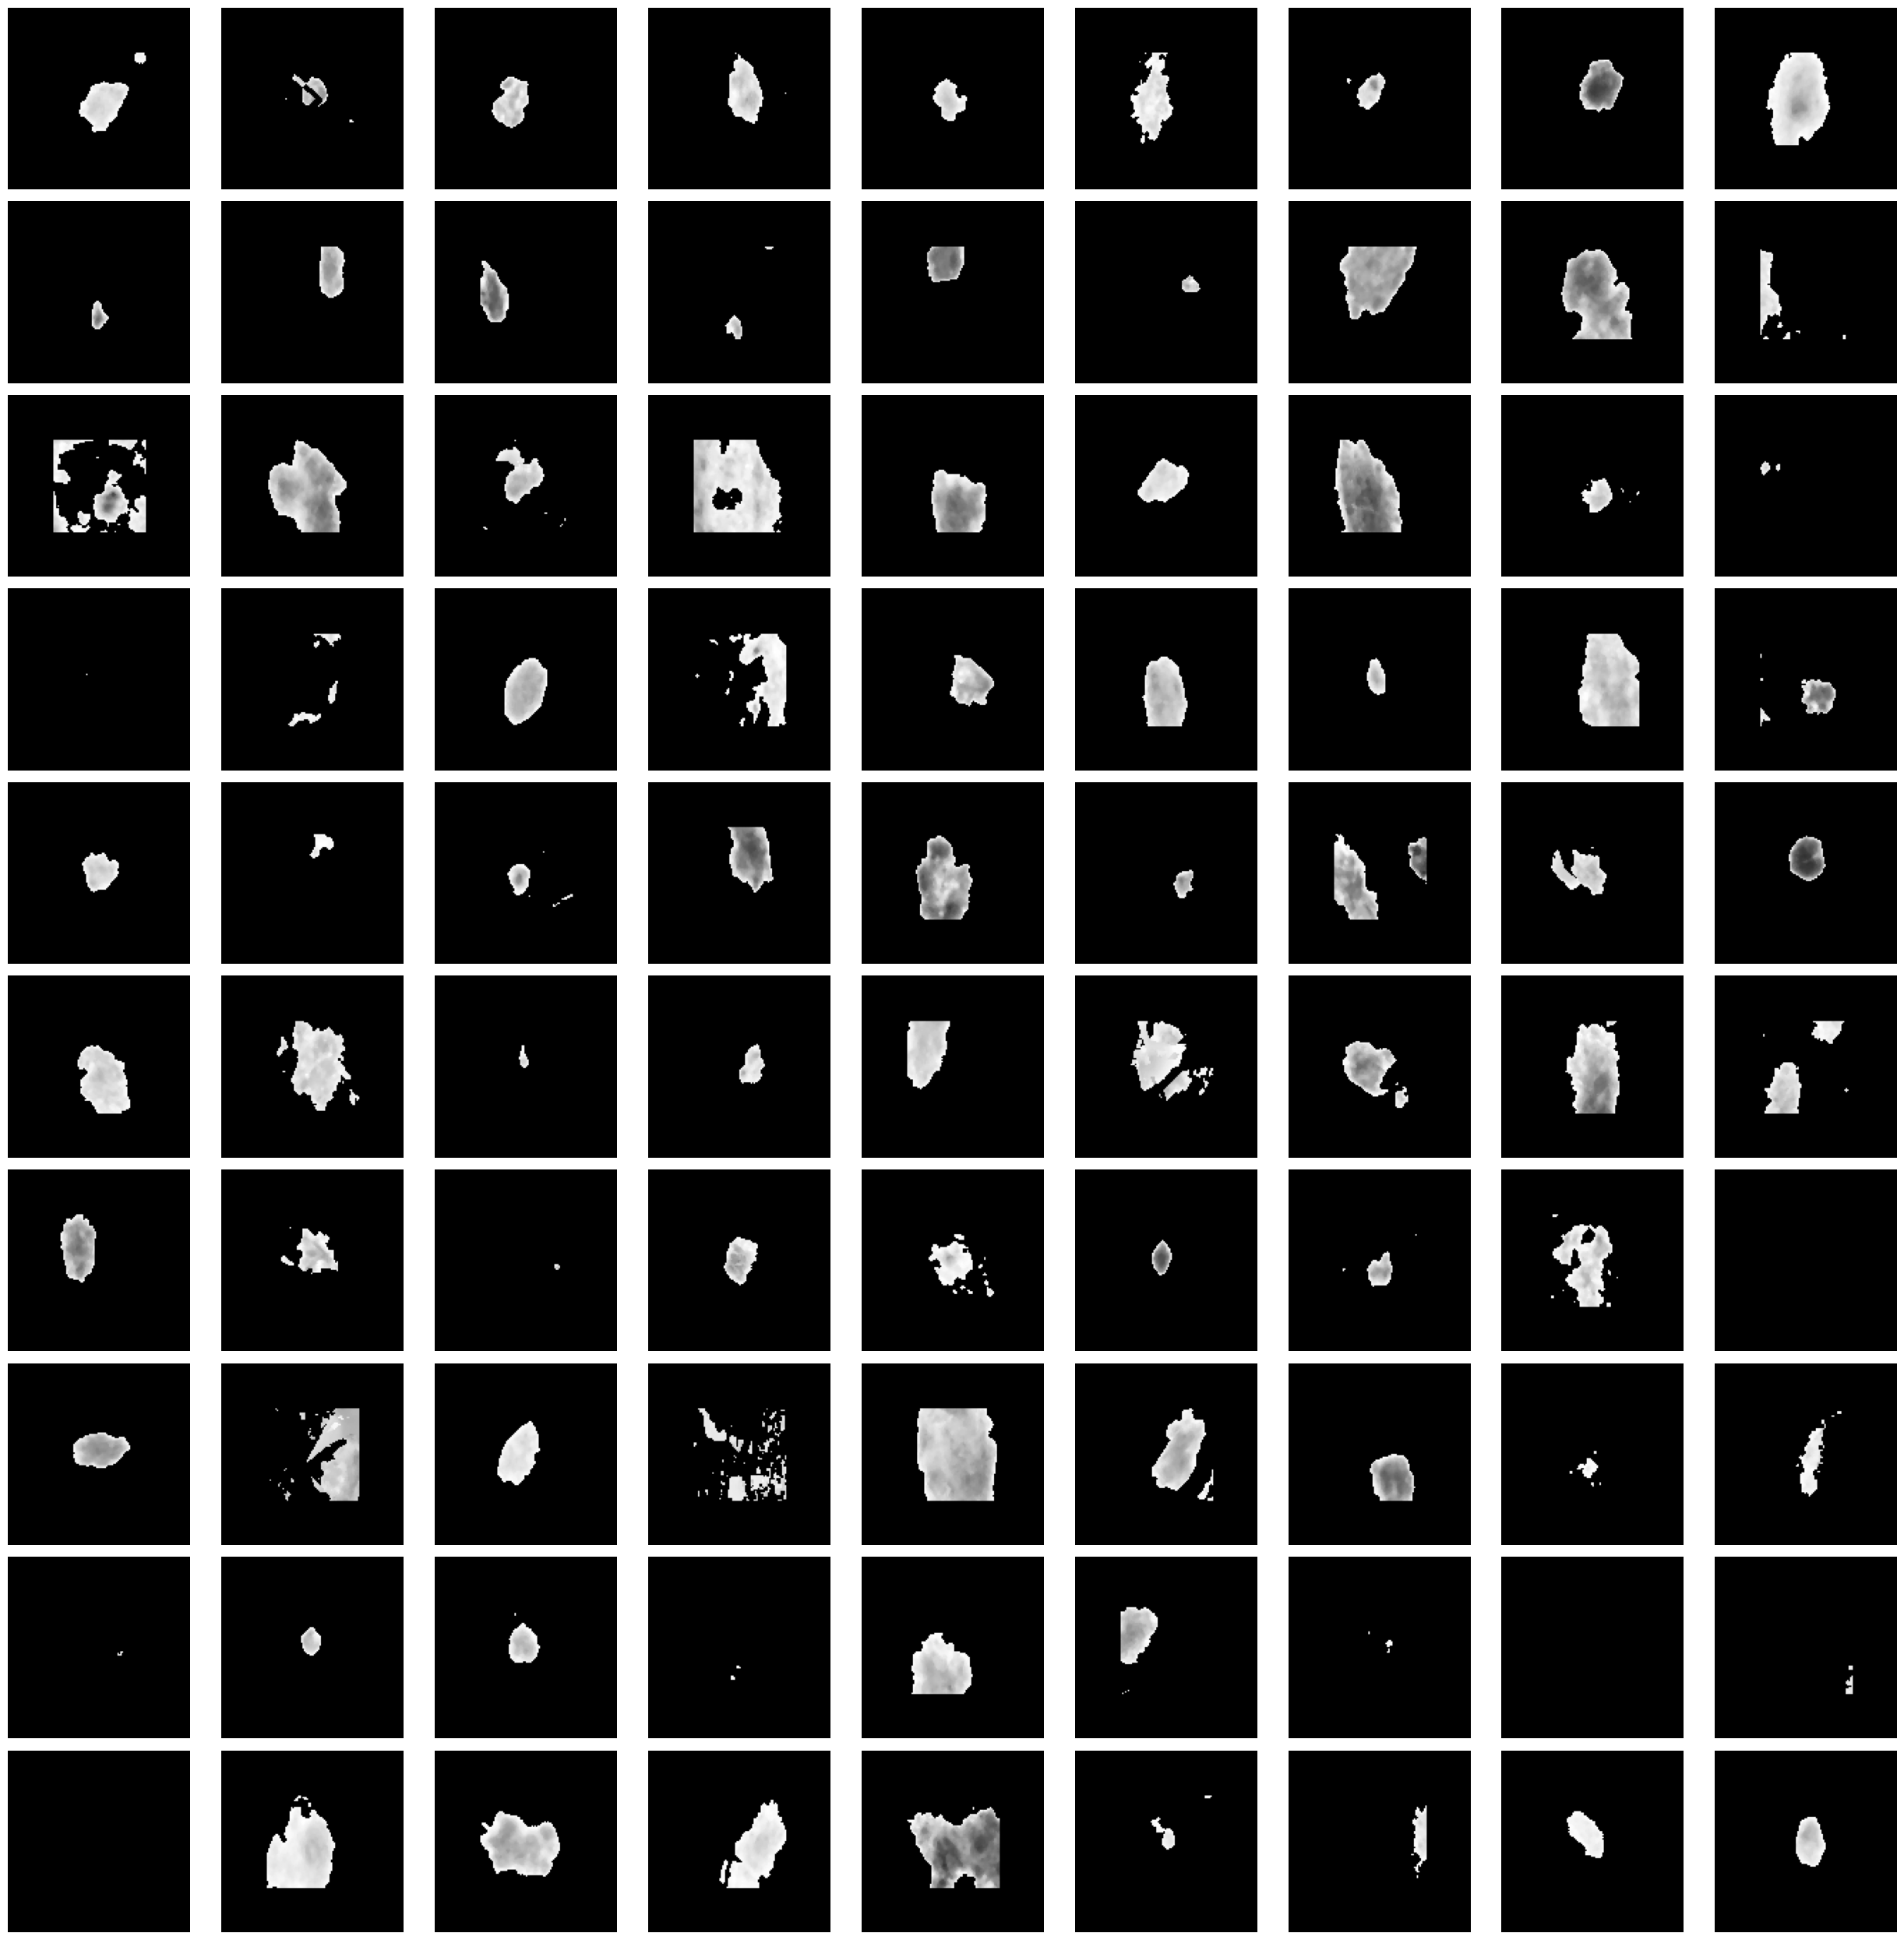

In [ ]:
#plot_img(roi_train[0:90])

In [38]:
# Example processing pipeline for both training and test data
'''
def process_images_rgb(train_X_gray, test_X_gray):
    inpainted_train_X, train_binary_mask = remove_hair(train_X_gray)
    inpainted_test_X, test_binary_mask = remove_hair(test_X_gray)

    return inpainted_train_X,inpainted_test_X
'''

'\ndef process_images_rgb(train_X_gray, test_X_gray):\n    inpainted_train_X, train_binary_mask = remove_hair(train_X_gray)\n    inpainted_test_X, test_binary_mask = remove_hair(test_X_gray)\n\n    return inpainted_train_X,inpainted_test_X\n'

In [39]:
#roi_train_rgb,roi_test_rgb= process_images_rgb(check1,check2)


In [40]:
#plot_img_rgb(roi_train_rgb[0:90])



Feature Engineering

1. Feature Creation

First Order Features (intensity base fearture)

In [41]:

from scipy.stats import skew, kurtosis, entropy

def first_order_features(image):
    image = image.flatten()  # Flatten to 1D
    features = {
        'mean': np.mean(image),
        'variance': np.var(image),
        'std_dev': np.std(image),
        'skewness': skew(image),
        'kurtosis': kurtosis(image),
        'median': np.median(image),
        'entropy': entropy(np.histogram(image, bins=256)[0], base=2)


    }
    return features


Seond Order feature (spatial intensity feature)

In [42]:

from skimage.feature import graycomatrix, graycoprops

def second_order_features_0(image,dist=[1,2,3]):  # 0 angle for multiple distance
  features={}
  glcm= graycomatrix(image, distances=dist, angles=[0], levels=256, symmetric=True, normed=True)
  features = {
        'contrast_0': graycoprops(glcm, 'contrast')[0, 0],
        'energy_0': graycoprops(glcm, 'energy')[0, 0],
        'homogeneity_0': graycoprops(glcm, 'homogeneity')[0, 0],
        'correlation_0': graycoprops(glcm, 'correlation')[0, 0],
    }
  return features

In [43]:
def second_order_features_45(image, dist=[1,2,3]):
    glcm=graycomatrix(image, distances=dist, angles=[45], levels=256, symmetric=True, normed=True)
    features={}

    features = {
        'contrast_45': graycoprops(glcm, 'contrast')[0, 0],
        'energy_45': graycoprops(glcm, 'energy')[0, 0],
        'homogeneity_45': graycoprops(glcm, 'homogeneity')[0, 0],
        'correlation_45': graycoprops(glcm, 'correlation')[0, 0],
    }
    return features

In [44]:
def second_order_features_90(image,dist=[1,2,3]):
  glcm=graycomatrix(image, distances=dist, angles=[90], levels=256, symmetric=True, normed=True)
  features={}
  features = {
        'contrast_90': graycoprops(glcm, 'contrast')[0, 0],
        'energy_90': graycoprops(glcm, 'energy')[0, 0],
        'homogeneity_90': graycoprops(glcm, 'homogeneity')[0, 0],
        'correlation_90': graycoprops(glcm, 'correlation')[0, 0],
    }
  return features

In [45]:
def second_order_features_135(image,dist=[1,2,3]):
  glcm=graycomatrix(image, distances=dist, angles=[135], levels=256, symmetric=True, normed=True)
  features={}
  features = {
        'contrast_135': graycoprops(glcm, 'contrast')[0, 0],
        'energy_135': graycoprops(glcm, 'energy')[0, 0],
        'homogeneity_135': graycoprops(glcm, 'homogeneity')[0, 0],
        'correlation_135': graycoprops(glcm, 'correlation')[0, 0],
    }
  return features

Local Binary Pattern

In [46]:
from skimage.feature import local_binary_pattern


def extract_lbp_features(image, radius=1, points=8):
    """
    Extract LBP features (derived from the LBP histogram) from an image.

    Parameters:
        image (numpy array): Grayscale input image.
        radius (int): Radius for LBP.
        points (int): Number of points for LBP.

    Returns:
        dict: Dictionary of features derived from the LBP histogram.
    """
    # Compute LBP
    lbp = local_binary_pattern(image, points, radius, method='uniform')

    # Compute histogram of LBP values
    n_bins = points + 2  # Number of bins for 'uniform' method
    lbp_hist, _ = np.histogram(lbp, bins=n_bins, range=(0, n_bins))

    # Normalize the histogram
    lbp_hist = lbp_hist.astype("float") / (lbp_hist.sum() + 1e-6)

    # Derive features from the histogram
    features = {
        'lbp_mean': np.mean(lbp_hist),
        'lbp_std': np.std(lbp_hist),
        'lbp_skewness': np.mean((lbp_hist - np.mean(lbp_hist))**3) / (np.std(lbp_hist)**3 + 1e-6),
        'lbp_kurtosis': np.mean((lbp_hist - np.mean(lbp_hist))**4) / (np.std(lbp_hist)**4 + 1e-6),
        'lbp_entropy': -np.sum(lbp_hist * np.log(lbp_hist + 1e-6)),
    }

    return features


Shape Feature

In [47]:
from skimage.measure import regionprops, label,perimeter

def extract_shape_features(image):

    # Calculate shape features
    features = {}

    # Threshold the image if it's grayscale to get a binary mask (assuming image is a lesion)
    _, binary_mask = cv.threshold(image, 127, 255, cv.THRESH_BINARY)
    labeled_mask = label(binary_mask)

    # Calculate region properties
    props = regionprops(labeled_mask)

    if props:  # If regions are detected
        region = props[0]  # Consider the first region (assuming it's the lesion)
        features = {
            'area': region.area,  # Total number of pixels in the detected object, representing its size
            'perimeter': region.perimeter,  # Length of the boundary of the object, useful for analyzing object boundaries
            'eccentricity': region.eccentricity,  # Measures how elongated the object is; closer to 1 indicates more elongation
            'solidity': region.solidity,  # Ratio of the object area to its convex hull area, indicating how 'filled' the shape is

            'bbox_minrow': region.bbox[0],  # Minimum row (y-coordinate) of the bounding box
            'bbox_mincol': region.bbox[1],  # Minimum column (x-coordinate) of the bounding box
            'bbox_maxrow': region.bbox[2],  # Maximum row (y-coordinate) of the bounding box
            'bbox_maxcol': region.bbox[3],  # Maximum column (x-coordinate) of the bounding box

            'circularity': 4 * np.pi * region.area / (region.perimeter ** 2) if region.perimeter > 0 else 0,  # Measures how close the shape is to a perfect circle
            'roughness': region.perimeter / perimeter(region.convex_image) if region.area > 0 else 0,  # Quantifies boundary irregularities by comparing the actual perimeter to the convex perimeter
            'fractal_dimension': (region.perimeter ** 2) / region.area if region.area > 0 else 0  # Quantifies the complexity of the object's shape
        }
    else:
        features = {
            'area': 0,  # No object detected, setting default values
            'perimeter': 0,
            'eccentricity': 0,
            'solidity': 0,

            'bbox_minrow': 0,
            'bbox_mincol': 0,
            'bbox_maxrow': 0,
            'bbox_maxcol': 0,


            'circularity': 0,
            'roughness': 0,
            'fractal_dimension': 0
        }

    return features


In [48]:
# extract edge features
def extract_edge_features(image):
     features={}
    # Extract Edge Features using Canny Edge Detection
     edges = cv.Canny(image, 100, 200)
     edge_density = np.sum(edges) / (edges.shape[0] * edges.shape[1])  # Percentage of edge pixels
     features = {
        'edge_density': edge_density
      }

     return features


In [49]:
def color_feature(image):
    features = {}

    # Compute Hu Moments for shape analysis
    hue_moments = cv.HuMoments(cv.moments(image)).flatten()

    # Create dictionary with Hu Moments
    features = {
        'hue_moment': hue_moments.mean()
    }

    return features


In [50]:


def extract_features(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) if len(image.shape) == 3 else image
    features = {}

    #first order
    features.update(first_order_features(image))

     # second order with different angle
    features.update(second_order_features_0(image))
    features.update(second_order_features_45(image))
    features.update(second_order_features_90(image))
    features.update(second_order_features_135(image))

    #shape
    features.update(extract_shape_features(image))

    #lbp
    features.update(extract_lbp_features(image))




    #color
    features.update(color_feature(image)) #texture base

    #edge feature
    features.update(extract_edge_features(image))

    return features


In [51]:
def put_to_file(images,label):
    features_list = []

    # Process all images
    for i in range(len(images)):

        features = extract_features(images[i])  # Extract features for each image
        features['image_index'] = i  # Add the image index as a column
        features['label'] = label[i]  # Add the label as a column
        features_list.append(features)

    # Convert to DataFrame
    df = pd.DataFrame(features_list)

    # Move the 'image_index' column to the front and 'label' column to the end
    df = df[['image_index'] + [col for col in df.columns if col not in ['image_index', 'label']] + ['label']]
    return df


In [52]:
# Save to Excel

put_to_file(roi_train,train_Y).to_excel('image_features_train.xlsx', index=False)

print("Features saved to 'image_features_train.xlsx'")



# Save to Excel
put_to_file(roi_test,test_Y).to_excel('image_features_test.xlsx', index=False)

print("Features saved to 'image_features_test.xlsx'")



<ipython-input-47-9b035ff7f6f6>:29: RuntimeWarning: invalid value encountered in scalar divide
  'roughness': region.perimeter / perimeter(region.convex_image) if region.area > 0 else 0,  # Quantifies boundary irregularities by comparing the actual perimeter to the convex perimeter


Features saved to 'image_features_train.xlsx'


<ipython-input-47-9b035ff7f6f6>:29: RuntimeWarning: invalid value encountered in scalar divide
  'roughness': region.perimeter / perimeter(region.convex_image) if region.area > 0 else 0,  # Quantifies boundary irregularities by comparing the actual perimeter to the convex perimeter


Features saved to 'image_features_test.xlsx'


In [53]:
import numpy as np        # for storing in array
import imageio as io      # for reading an images
import pandas as pd       # for storing data in frame
import matplotlib.pyplot as plt   # for plotting
import cv2 as cv          #for reading an images
import glob as gp         #for reading folder
import os                 #for accessing an image in folder
import seaborn as sns     #advance ploting

In [55]:
train_feature=pd.read_excel('/content/image_features_train.xlsx')
test_feature=pd.read_excel('/content/image_features_test.xlsx')

In [56]:
train_feature.head(5)                 # 0-->begnin 1-->malonama

,image_index,mean,variance,std_dev,skewness,kurtosis,median,entropy,contrast_0,energy_0,...,roughness,fractal_dimension,lbp_mean,lbp_std,lbp_skewness,lbp_kurtosis,lbp_entropy,hue_moment,edge_density,label
0,0,156.955566,9243.400003,96.142602,-1.011060,-0.958207,212.0,4.269442,905.886811,0.266753,...,1.505476,36.523758,0.1,0.109940,1.555900,4.489109,1.779005,0.000124,7.439575,benign
1,1,138.084351,7321.942836,85.568352,-0.962611,-1.006019,184.0,4.821055,996.112082,0.256134,...,2.223865,83.225756,0.1,0.097830,1.691016,5.019456,1.906753,0.000129,13.027039,benign
2,2,144.490479,1103.843171,33.224135,-4.020686,14.585830,152.0,4.262972,131.693159,0.142446,...,1.393187,31.115404,0.1,0.077925,0.575117,2.083306,1.974580,0.000170,2.832642,benign
3,3,163.363403,9096.856219,95.377441,-1.119454,-0.725242,216.0,4.356160,1453.053765,0.240240,...,1.951744,61.047786,0.1,0.108544,1.454511,4.136184,1.780287,0.000120,9.976501,benign
4,4,168.972046,6389.786572,79.936141,-1.587087,0.647301,205.0,5.127130,440.958108,0.183060,...,1.259817,25.125315,0.1,0.095669,0.832480,2.360403,1.836093,0.000119,4.513550,benign


In [57]:
train_feature.isnull().sum()
test_feature.isnull().sum()

,0
image_index,0
mean,0
variance,0
std_dev,0
skewness,0
kurtosis,0
median,0
entropy,0
contrast_0,0
energy_0,0


Handling Missing values

In [58]:
# Fill missing values in train_feature
'''
train_feature['skewness'] = train_feature['skewness'].fillna(train_feature['skewness'].mean())
train_feature['kurtosis'] = train_feature['kurtosis'].fillna(train_feature['kurtosis'].mean())

# Fill missing values in test_feature
test_feature['skewness'] = test_feature['skewness'].fillna(test_feature['skewness'].mean())
test_feature['kurtosis'] = test_feature['kurtosis'].fillna(test_feature['kurtosis'].mean())
'''
train_feature['roughness'] = train_feature['roughness'].fillna(train_feature['roughness'].mean())

test_feature['roughness'] = test_feature['roughness'].fillna(test_feature['roughness'].mean())


"\ntrain_feature['skewness'] = train_feature['skewness'].fillna(train_feature['skewness'].mean())\ntrain_feature['kurtosis'] = train_feature['kurtosis'].fillna(train_feature['kurtosis'].mean())\ntrain_feature['roughness'] = train_feature['roughness'].fillna(train_feature['roughness'].mean())\n\n# Fill missing values in test_feature\ntest_feature['skewness'] = test_feature['skewness'].fillna(test_feature['skewness'].mean())\ntest_feature['kurtosis'] = test_feature['kurtosis'].fillna(test_feature['kurtosis'].mean())\ntest_feature['roughness'] = test_feature['roughness'].fillna(test_feature['roughness'].mean())\n"

Label Encoder:

In [59]:
#perform a label encoding on last column 'label'

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_feature['label'] = label_encoder.fit_transform(train_feature['label'])
test_feature['label'] = label_encoder.fit_transform(test_feature['label'])

In [60]:
#Correlation Heatmap
#Use a heatmap to visualize the correlation matrix. Highly correlated features (values near 1 or -1) indicate redundancy,
#while weakly correlated features (near 0) may provide unique information.

def plot_correlation_matrix(data):
    plt.figure(figsize=(30,20))
    data=data.drop(columns=['image_index','label'])
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()



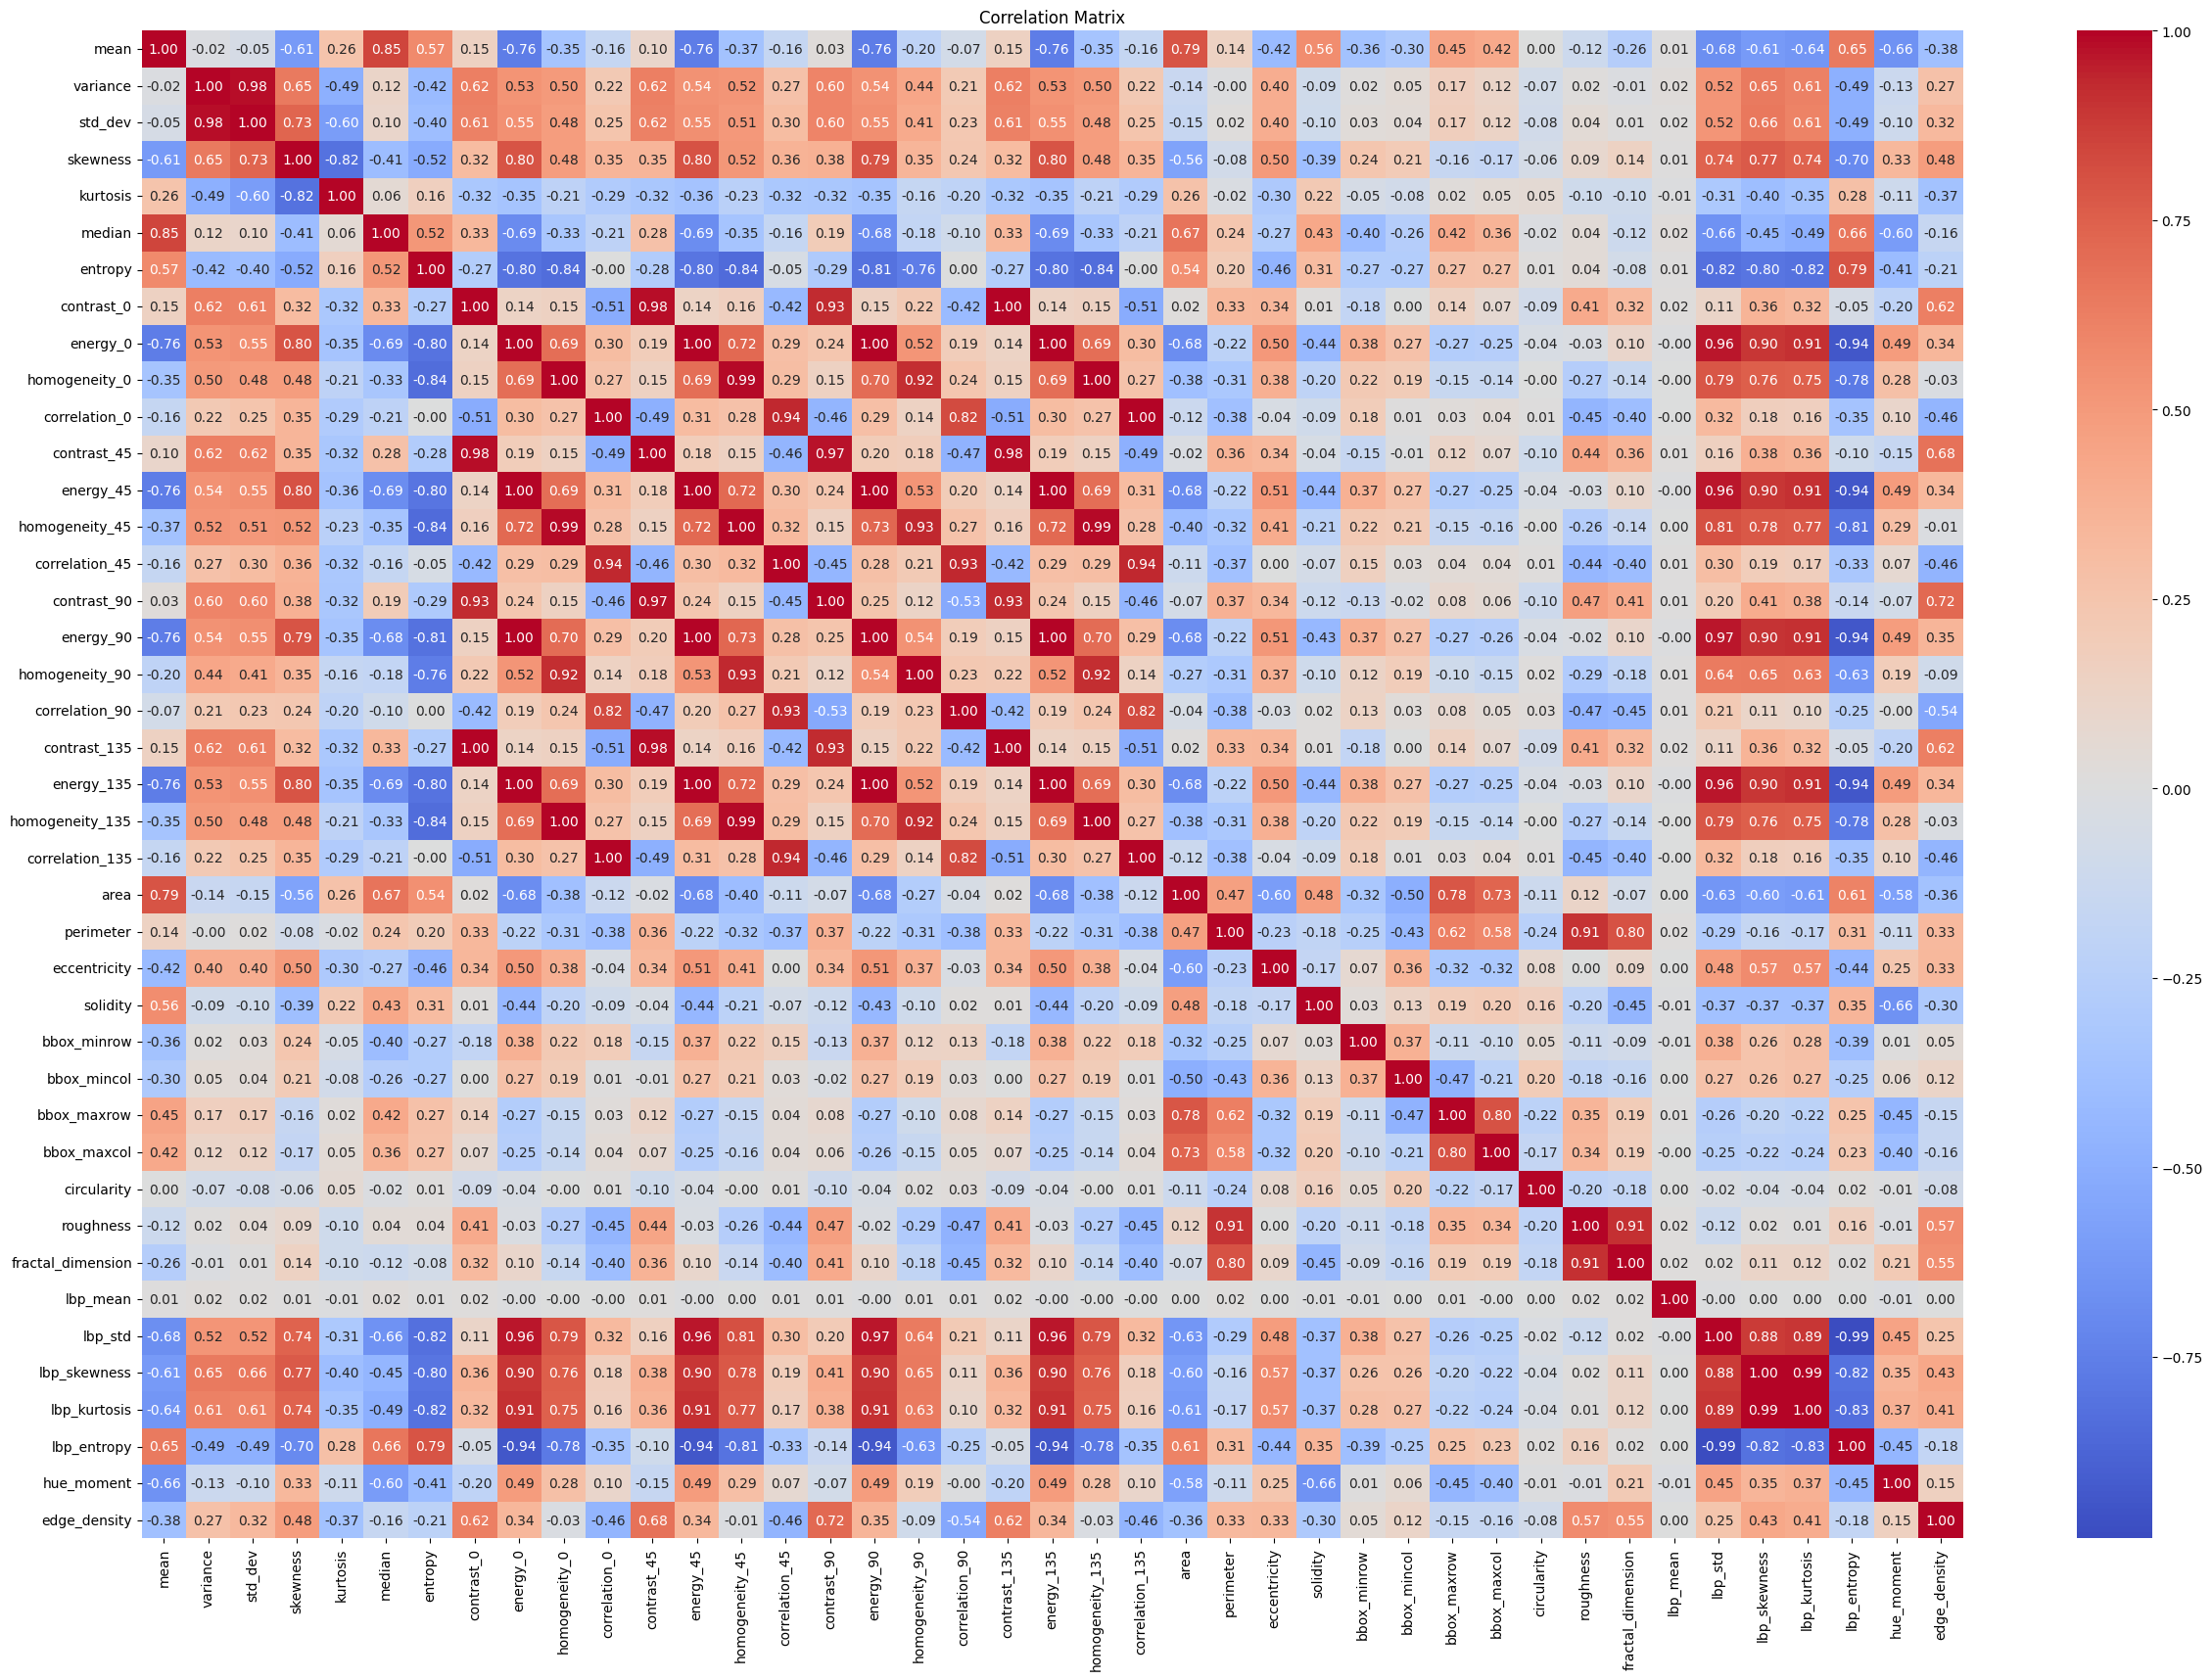

In [61]:
plot_correlation_matrix(train_feature)

Correlation matrix

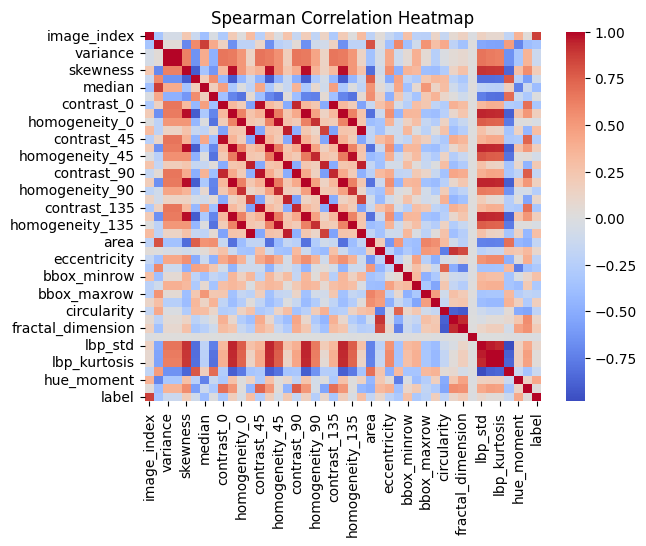

In [62]:
spearman_corr = train_feature.corr(method='spearman')
sns.heatmap(spearman_corr, annot=False, cmap='coolwarm')
plt.title("Spearman Correlation Heatmap")
plt.show()


2. Feature Transformation and scaling

https://parisrohan.medium.com/feature-transformation-techniques-using-python-fcf36e872bb3#:~:text=Feature%20transformation%20is%20an%20important,algorithms%20are%20of%20no%20use.

https://github.com/ParisRohan/Kaggle_DataScience_Projects/blob/main/rp-pima-diabetes-1-eda-and-feature-transformation.ipynb?source=post_page-----fcf36e872bb3--------------------------------

https://github.com/krishnaik06/Types-Of-Trnasformation/blob/main/All%20types%20Of%20Feature%20Transformation.ipynb?source=post_page-----fcf36e872bb3--------------------------------



In [63]:
def plot_feature_histograms(features):

    # Create a figure with subplots for each feature
    plt.figure(figsize=(20, 20))  # Adjust figsize for better visibility
    num_features = len(features.columns)
    num_cols = 3  # Number of columns in the subplot grid
    num_rows = int(np.ceil(num_features / num_cols))  # Calculate number of rows

    for idx, feature_name in enumerate(features.columns):
        plt.subplot(num_rows, num_cols, idx + 1)
        feature_value = features[feature_name]


        # For scalar features, plot a histogram using .hist
        plt.hist(feature_value, bins=100, color='blue', alpha=0.7)
        plt.title(f'Histogram of {feature_name}')


        plt.tight_layout()

    plt.show()

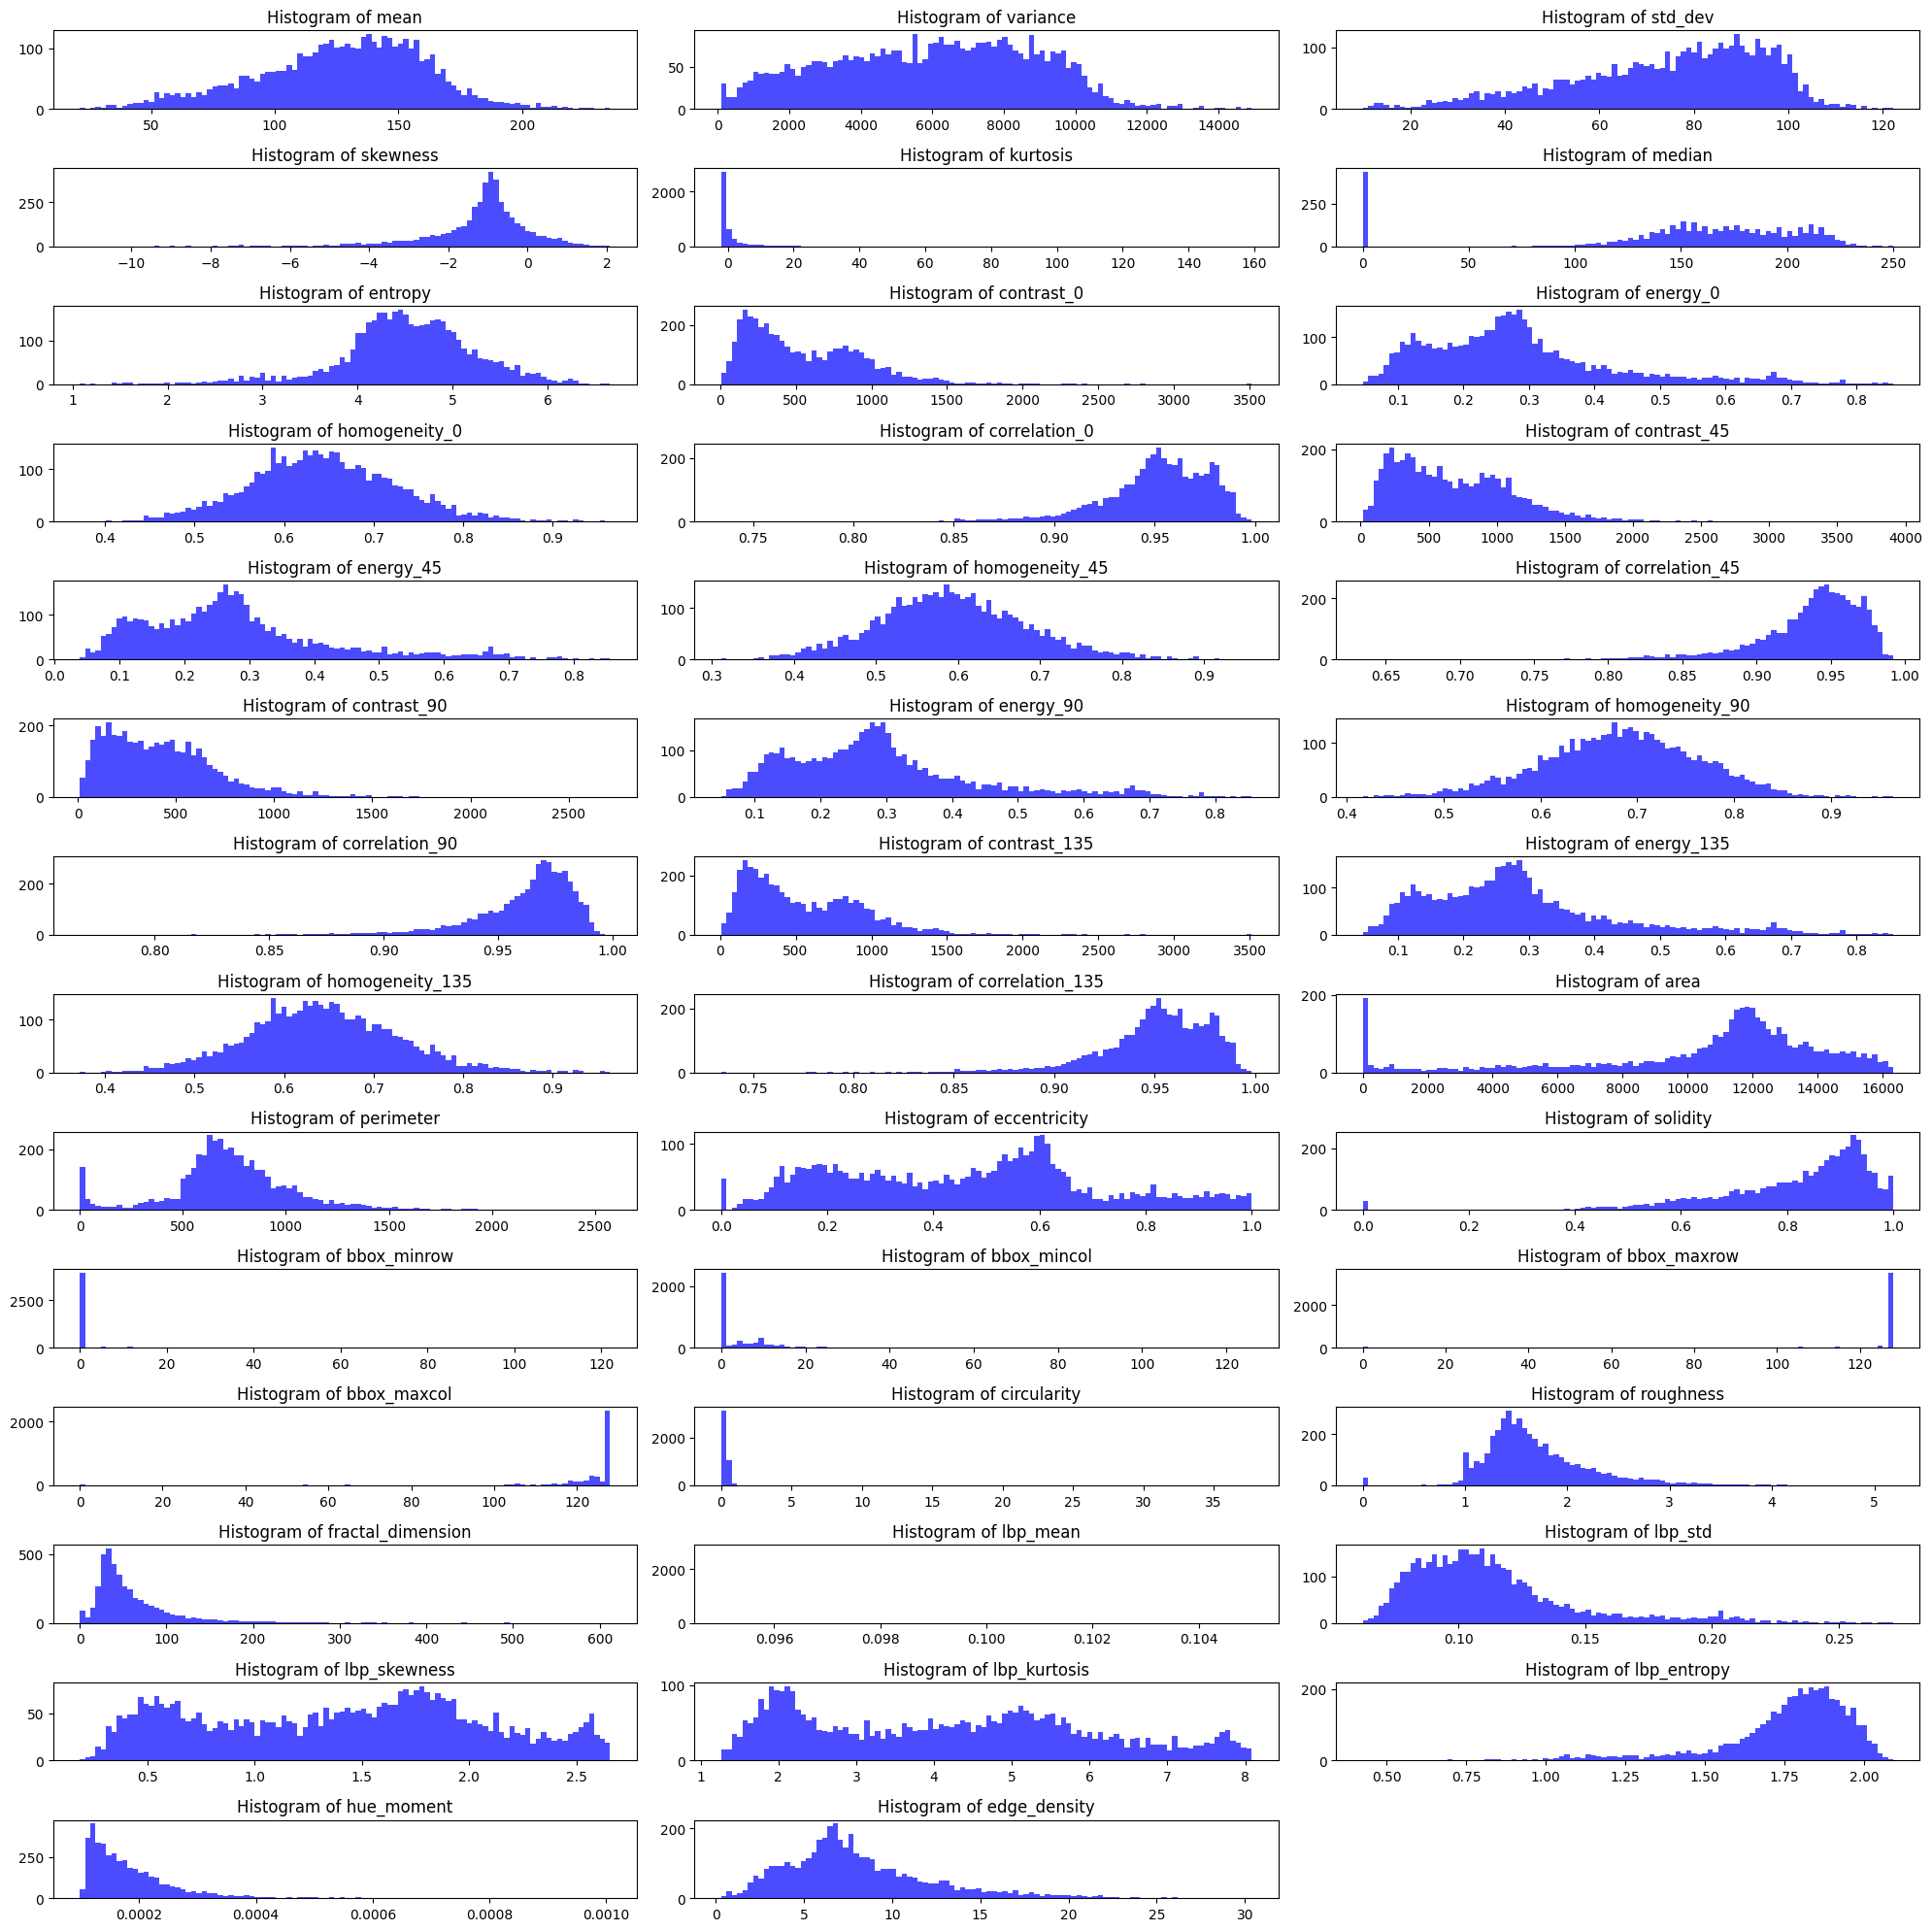

In [64]:
data_train=train_feature.drop(columns=['image_index','label'])
data_test=test_feature.drop(columns=['image_index','label'])
plot_feature_histograms(data_train)

In [65]:
from scipy import stats


def handle_skewness(data, skew_threshold=0.5):


    # Detect skewness for numeric columns
    skewness = data.skew(numeric_only=True)

    # Initialize dictionary for transformed columns
    transformed_columns = {}

    # Iterate through each column
    for column in data.columns:
        if data[column].dtype in ['float64', 'int64']:  # Process only numeric columns

            # Fill missing values with the column mean
            data[column] = data[column].fillna(data[column].mean())

            # Get skewness of the column
            skew = skewness.get(column, 0)

            # Only apply transformation if skewness exceeds threshold
            if abs(skew) > skew_threshold:
                try:
                    # Yeo-Johnson Transformation (works for both positive and negative skew)
                    transformed_columns[column] = stats.yeojohnson(data[column])[0]
                except Exception as e:
                    print(f"Error transforming column '{column}': {e}")
                    transformed_columns[column] = data[column]
            else:
                # Retain original column if no significant skewness
                transformed_columns[column] = data[column]

    # Convert transformed columns into a DataFrame
    transformed_data = pd.DataFrame(transformed_columns)

    return transformed_data


In [66]:
data_train_sk= handle_skewness(data_train)
data_test_sk=handle_skewness(data_test)

In [67]:
# Before fitting the model, print the shape of X_train and X_test to check dimensions:
print("Shape of data_train:", data_train_sk.shape)
print("Shape of data_test:", data_test_sk.shape)

Shape of data_train: (4309, 41)
Shape of data_test: (685, 41)


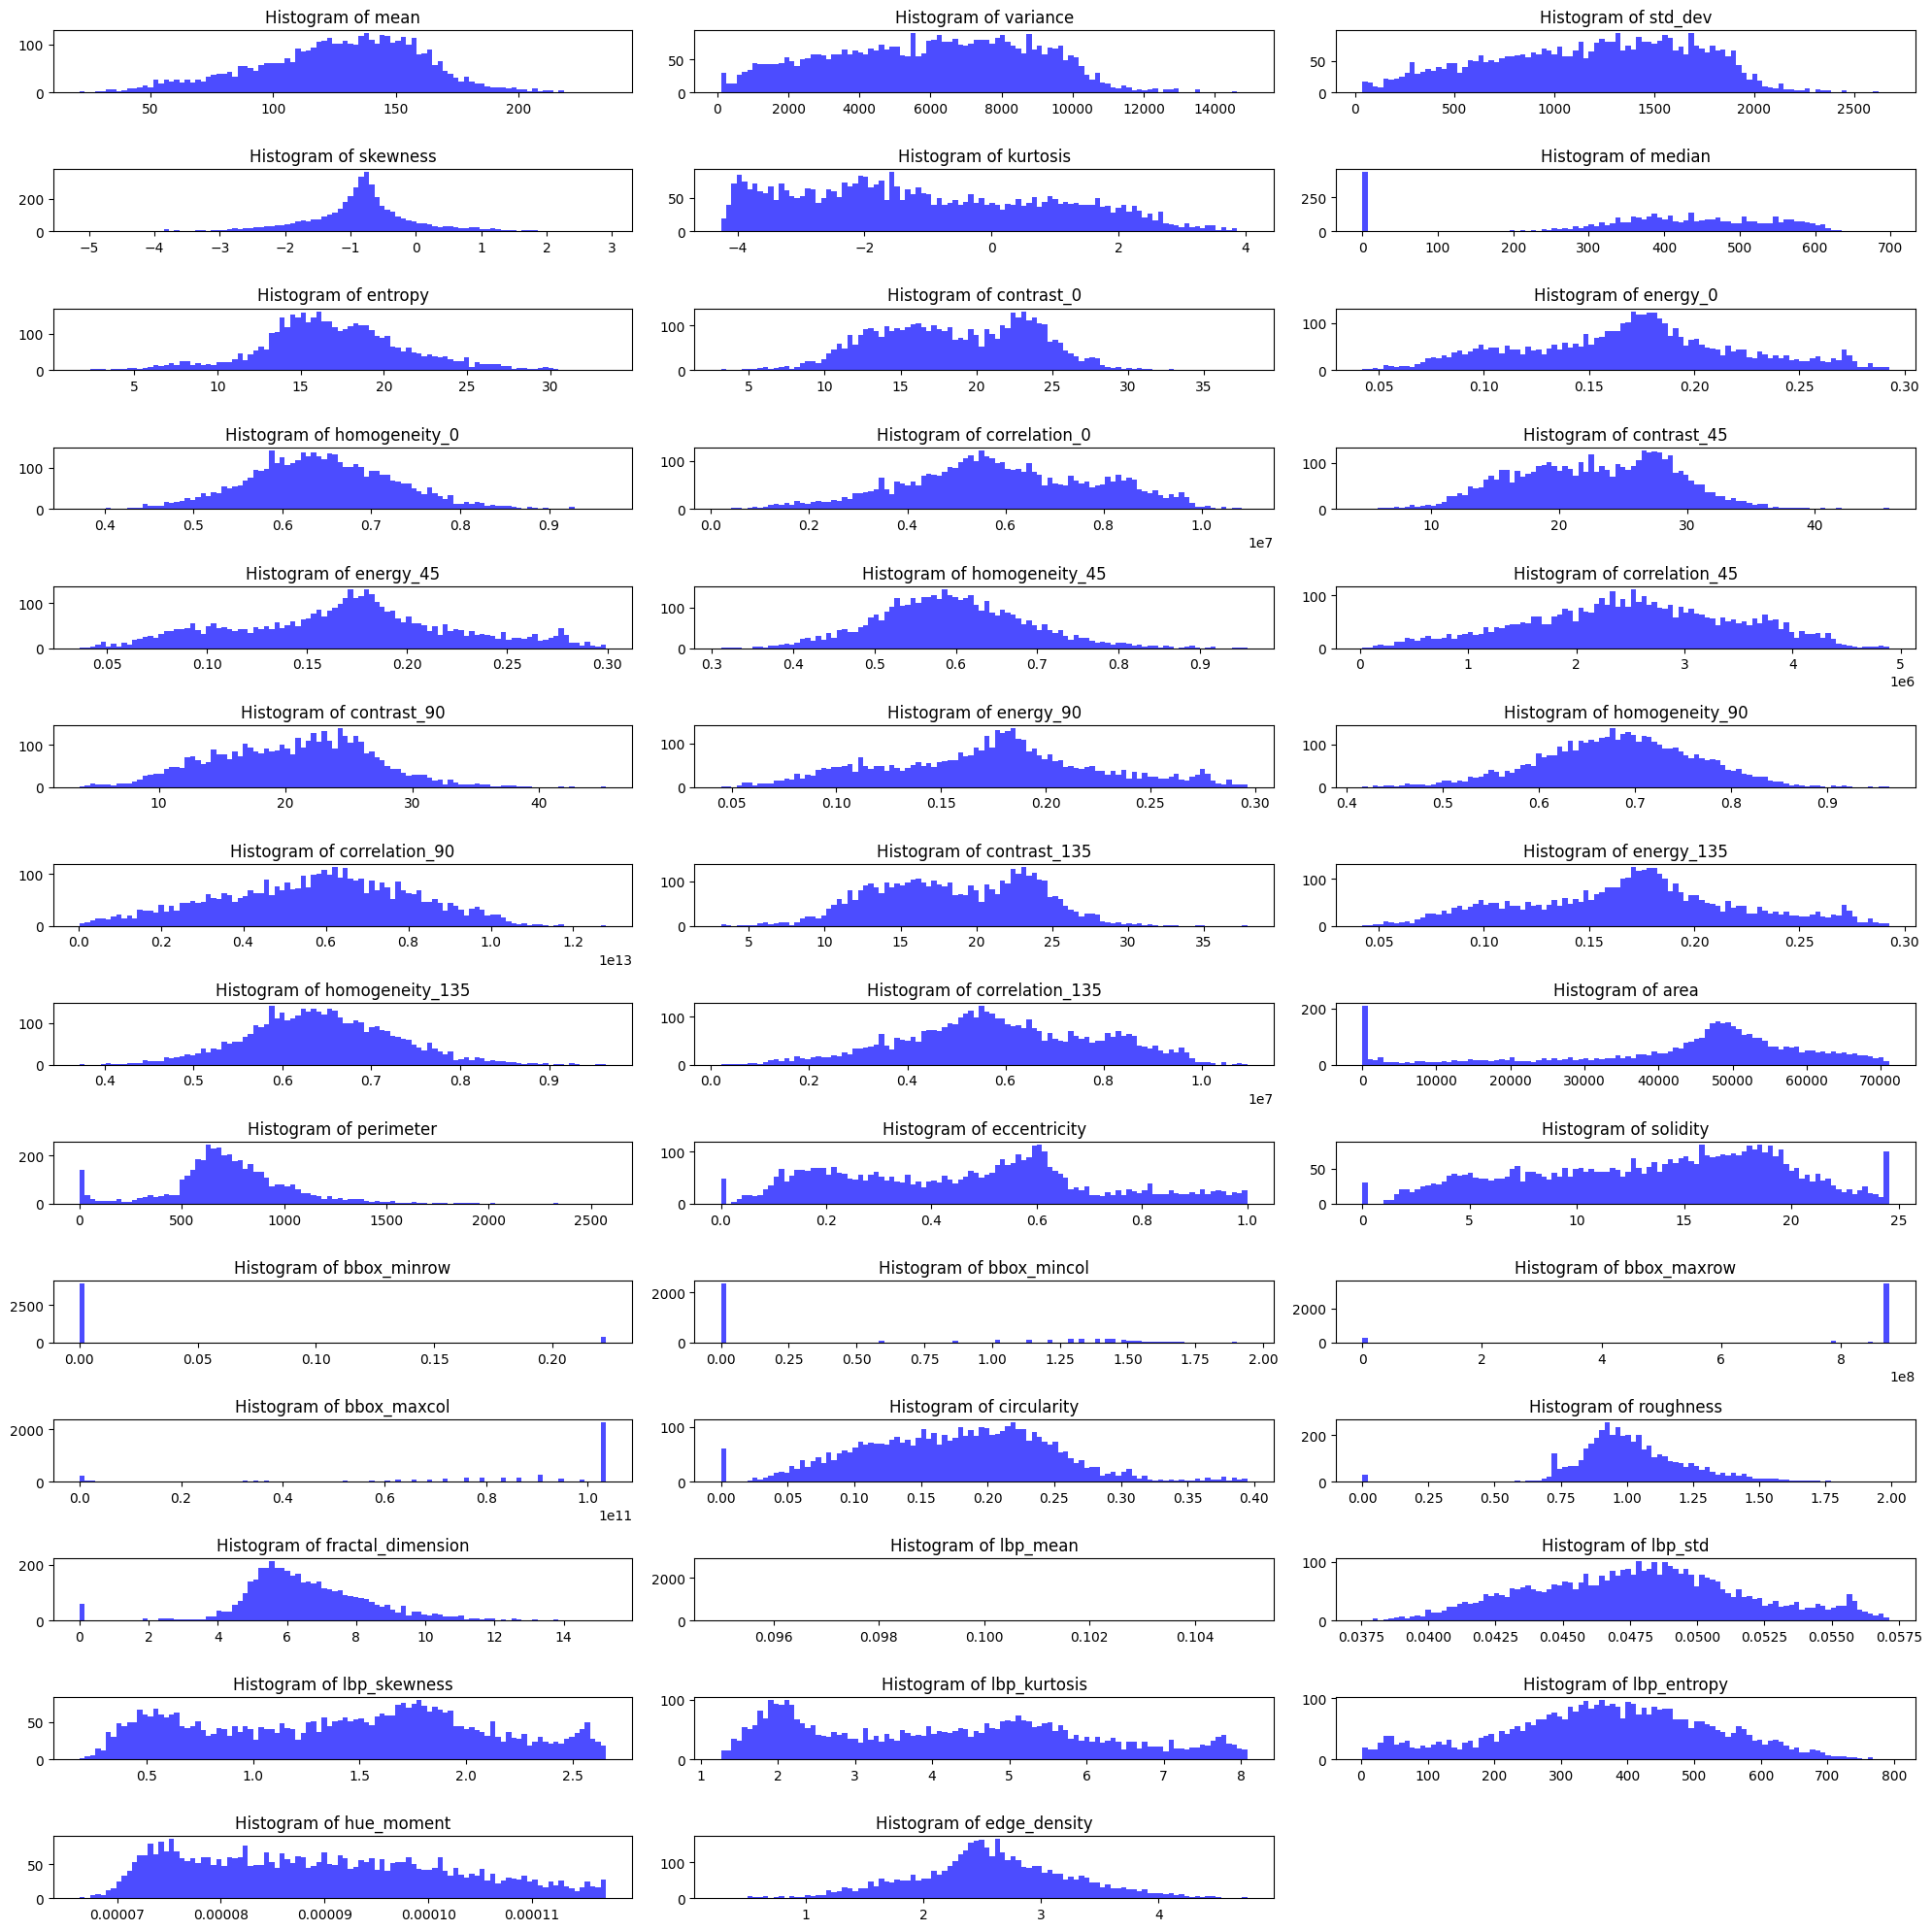

In [68]:
plot_feature_histograms(data_train_sk)

Scaling

https://www.geeksforgeeks.org/principal-component-analysis-pca/

In [160]:
X_train=data_train
Y_train=train_feature['label']

X_test=data_test
Y_test=test_feature['label']

In [161]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

3. Feature Extraction

https://www.geeksforgeeks.org/difference-between-pca-vs-t-sne/

In [162]:
# Applying PCA function on training

from sklearn.decomposition import PCA

pca = PCA(20)


X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.38307501 0.19387378 0.1117545  0.07830995 0.0573971  0.03667533
 0.02268437 0.01980784 0.01632647 0.01233429 0.0121916  0.01013147
 0.00773812 0.00730931 0.00574658 0.00475877 0.00400893 0.00323739
 0.00252822 0.00244742]


In [163]:
print(np.cumsum(explained_variance))

[0.38307501 0.57694879 0.68870329 0.76701324 0.82441034 0.86108567
 0.88377003 0.90357788 0.91990434 0.93223863 0.94443023 0.95456169
 0.96229982 0.96960912 0.97535571 0.98011447 0.9841234  0.98736079
 0.98988901 0.99233643]


Text(0, 0.5, 'Cumulative explained variance')

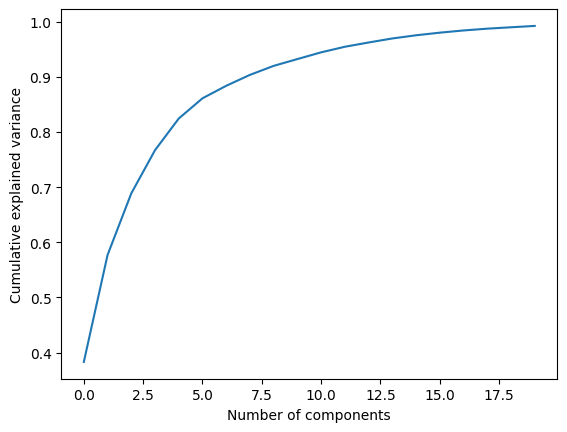

In [164]:
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [165]:
# Before fitting the model, print the shape of X_train and X_test to check dimensions:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)


print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (4309, 20)
Shape of Y_train: (4309,)
Shape of X_test: (685, 20)
Shape of Y_test: (685,)


4. Feature Selection

**Model Preparation**

1. Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [167]:
# Before fitting the model, print the shape of X_train and X_test to check dimensions:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", Y_train.shape)

Shape of X_train: (4309, 20)
Shape of X_test: (4309,)


In [168]:
model1= LogisticRegression(random_state=0)
model1.fit(X_train,Y_train)

# Predicting the test set result using
# predict function under LogisticRegression
y_pred1=model1.predict(X_test)

# making confusion matrix between
#  test set of Y and predicted value.



In [169]:
accurancy1=accuracy_score(Y_test,y_pred1)
print(accurancy1)
cm = confusion_matrix(Y_test, y_pred1)
print(cm)

classification_report1=classification_report(Y_test,y_pred1)
print(classification_report1)

0.8598540145985402
[[150  35]
 [ 61 439]]
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       185
           1       0.93      0.88      0.90       500

    accuracy                           0.86       685
   macro avg       0.82      0.84      0.83       685
weighted avg       0.87      0.86      0.86       685



2. Naive Base Classifer

In [170]:
from sklearn.naive_bayes import GaussianNB

model2=GaussianNB()
model2.fit(X_train,Y_train)
y_predict2=model2.predict(X_test)

In [171]:
accurancy2=accuracy_score(Y_test,y_predict2)
print(accurancy2)

classification_report2=classification_report(Y_test,y_predict2)
print(classification_report2)

0.7153284671532847
              precision    recall  f1-score   support

           0       0.48      0.85      0.62       185
           1       0.92      0.66      0.77       500

    accuracy                           0.72       685
   macro avg       0.70      0.76      0.70       685
weighted avg       0.81      0.72      0.73       685



3. Support vector machine (SVM)

In [172]:
from sklearn.svm import SVC

model3=SVC()
model3.fit(X_train,Y_train)
y_pred3=model3.predict(X_test)

In [173]:
accurancy3=accuracy_score(Y_test,y_pred3)
print(accurancy3)

classification_report3=classification_report(Y_test,y_pred3)
print(classification_report3)

0.872992700729927
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       185
           1       0.94      0.88      0.91       500

    accuracy                           0.87       685
   macro avg       0.83      0.87      0.85       685
weighted avg       0.88      0.87      0.88       685



4. K-Near Neighbor (KNN)

In [174]:
from sklearn.neighbors import KNeighborsClassifier

model4=KNeighborsClassifier()
model4.fit(X_train,Y_train)
y_pred4=model4.predict(X_test)

In [175]:
#accurancy
accurancy4=accuracy_score(Y_test,y_pred4)
print(accurancy4)

classification_report4=classification_report(Y_test,y_pred4)
print(classification_report4)

0.8496350364963504
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       185
           1       0.93      0.86      0.89       500

    accuracy                           0.85       685
   macro avg       0.81      0.84      0.82       685
weighted avg       0.86      0.85      0.85       685



5.Decision Tree

In [176]:
from sklearn.tree import DecisionTreeClassifier

model5=DecisionTreeClassifier()
model5.fit(X_train,Y_train)
y_pred5=model5.predict(X_test)

In [177]:
#accurany
accurancy5=accuracy_score(Y_test,y_pred5)
print(accurancy5)
classification_report5=classification_report(Y_test,y_pred5)
print(classification_report5)

0.8204379562043795
              precision    recall  f1-score   support

           0       0.63      0.79      0.71       185
           1       0.92      0.83      0.87       500

    accuracy                           0.82       685
   macro avg       0.77      0.81      0.79       685
weighted avg       0.84      0.82      0.83       685



6.Ensemble learning

6.1 Random Forest

In [178]:
from sklearn.ensemble import RandomForestClassifier
model6=RandomForestClassifier()
model6.fit(X_train,Y_train)
y_pred6=model6.predict(X_test)

In [179]:
#accurancy
accurancy6=accuracy_score(Y_test,y_pred6)
print(accurancy6)

classification_report6=classification_report(Y_test,y_pred6)
print(classification_report6)

0.8802919708029197
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       185
           1       0.94      0.89      0.92       500

    accuracy                           0.88       685
   macro avg       0.84      0.87      0.85       685
weighted avg       0.89      0.88      0.88       685



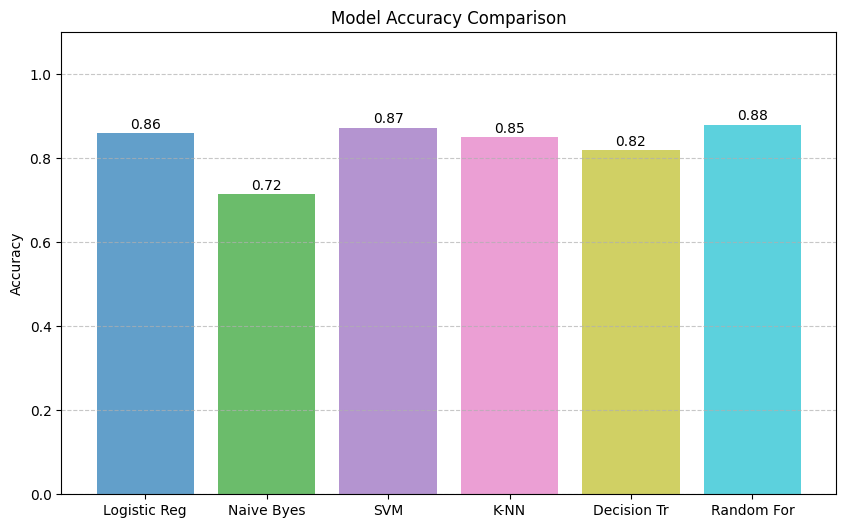

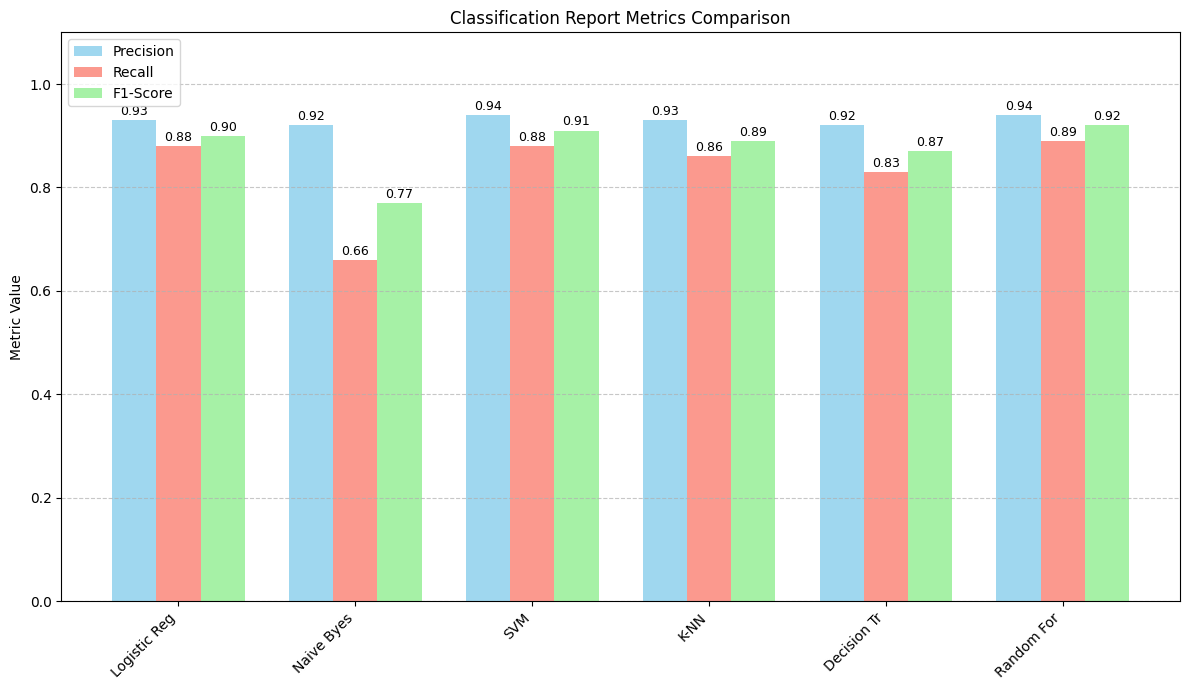

In [180]:
#plot_ to see a performance for different model


def plot_model_performance(models, accuracies, classification_reports):
    """
    Plot the performance of models using accuracy and classification report metrics.

    Parameters:
    - models: List of model names (strings).
    - accuracies: List of accuracy values (floats).
    - classification_reports: List of dictionaries containing precision, recall, and F1-score for each model.
    """


    # Set up colors
    colors = plt.cm.tab10(np.linspace(0, 1, len(models)))

    # Plot Accuracy Comparison
    plt.figure(figsize=(10, 6))
    plt.bar(models, accuracies, color=colors, alpha=0.7)
    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10)
    plt.title("Model Accuracy Comparison")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


    print()
    print()
    # Plot Classification Report Metrics
    metrics = ['precision', 'recall', 'f1-score']
    x = np.arange(len(models))
    width = 0.25

    # Extract metrics from classification reports
    precision = [float(report.split('\n')[3].split()[1]) for report in classification_reports if report]
    recall = [float(report.split('\n')[3].split()[2]) for report in classification_reports if report]
    f1_score = [float(report.split('\n')[3].split()[3]) for report in classification_reports if report]


    # Create grouped bar plot
    plt.figure(figsize=(12, 7))
    plt.bar(x - width, precision, width, label='Precision', color='skyblue', alpha=0.8)
    plt.bar(x, recall, width, label='Recall', color='salmon', alpha=0.8)
    plt.bar(x + width, f1_score, width, label='F1-Score', color='lightgreen', alpha=0.8)

    # Add value labels
    for i in range(len(models)):
        plt.text(x[i] - width, precision[i] + 0.01, f"{precision[i]:.2f}", ha='center', fontsize=9)
        plt.text(x[i], recall[i] + 0.01, f"{recall[i]:.2f}", ha='center', fontsize=9)
        plt.text(x[i] + width, f1_score[i] + 0.01, f"{f1_score[i]:.2f}", ha='center', fontsize=9)

    plt.xticks(x, models, rotation=45, ha='right')
    plt.title("Classification Report Metrics Comparison")
    plt.ylabel("Metric Value")
    plt.ylim(0, 1.1)
    plt.legend(loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example usage
models = ['Logistic Reg', 'Naive Byes', 'SVM', 'K-NN', 'Decision Tr', 'Random For']
accuracies = [accurancy1, accurancy2, accurancy3, accurancy4, accurancy5, accurancy6]
classification_reports = [classification_report1, classification_report2, classification_report3,
                            classification_report4, classification_report5, classification_report6]

plot_model_performance(models, accuracies, classification_reports)


Feature Importance for different data set

https://www.geeksforgeeks.org/machine-learning-explainability-using-permutation-importance/
https://scikit-learn.org/0.24/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance

In [90]:
from sklearn.inspection import permutation_importance

def plot_feature_importance(model, feature_names):
  """
  Plots feature importance using permutation importance for any model.
  """
  result = permutation_importance(model, X_train, Y_train, n_repeats=10, random_state=42)

  perm_sorted_idx = result.importances_mean.argsort()

  fig, ax = plt.subplots(figsize=(12, 8))
  # Pass the importances as the height argument
  ax.barh(feature_names[perm_sorted_idx], result.importances_mean[perm_sorted_idx])

  ax.set_title("Permutation Importances (train set)")
  fig.tight_layout()
  plt.show()



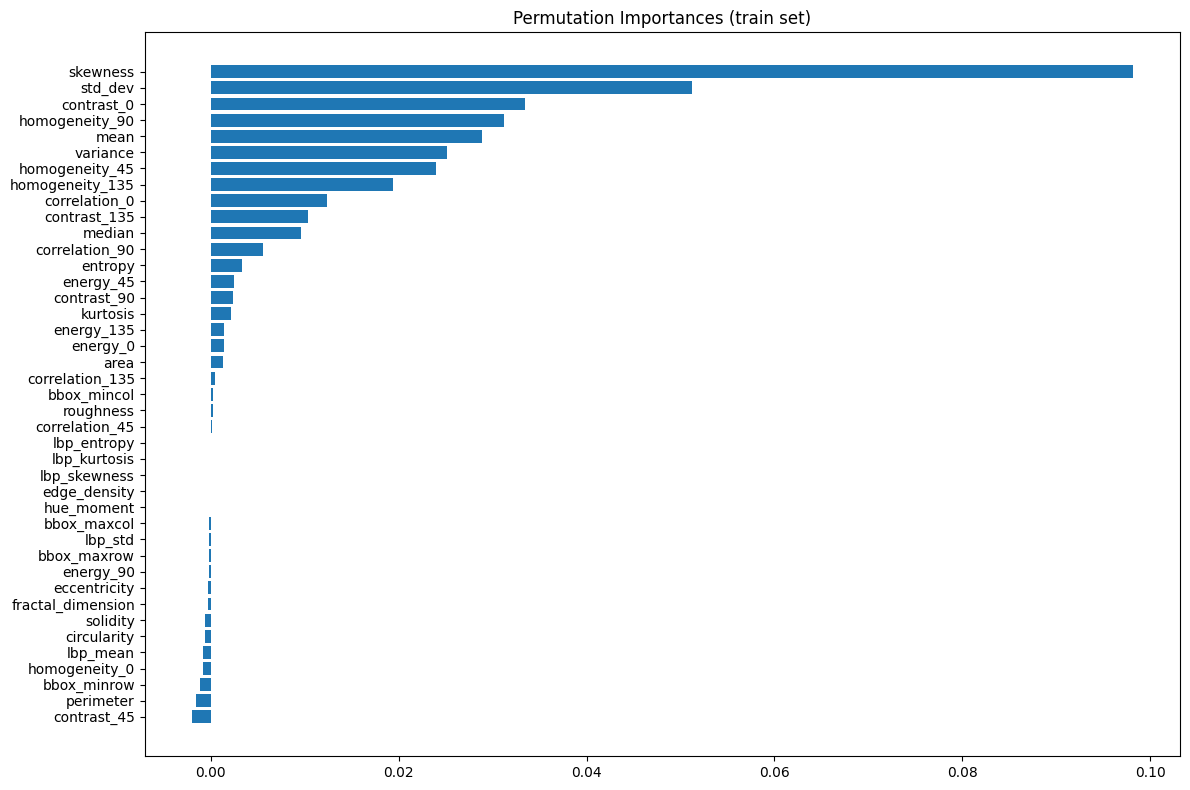

In [91]:
# Assuming data_train is your DataFrame and you want to use all its columns as feature names:
feature_names = data_train.columns  # or data_train.columns[1:-1] if 'image_index' and 'label' are excluded

# To plot feature importance for Logistic Regression:
plot_feature_importance(model1, feature_names)

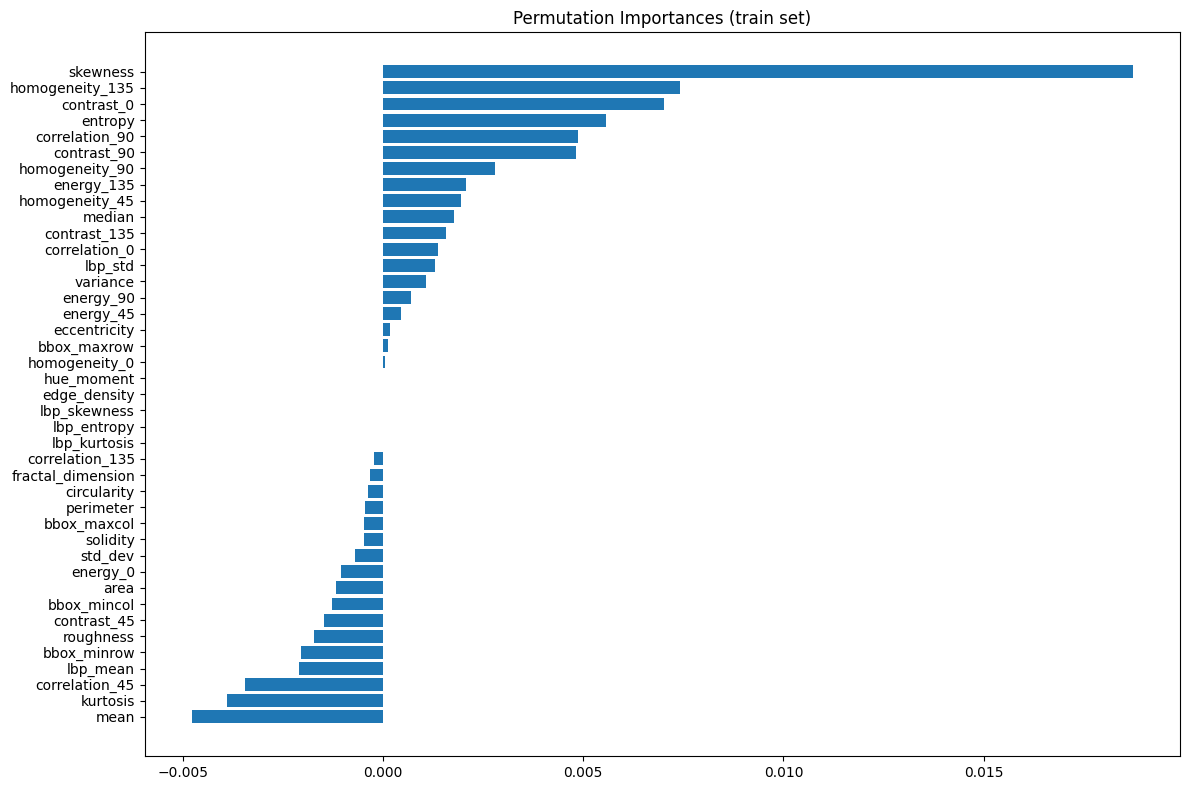

In [92]:
plot_feature_importance(model2,feature_names)

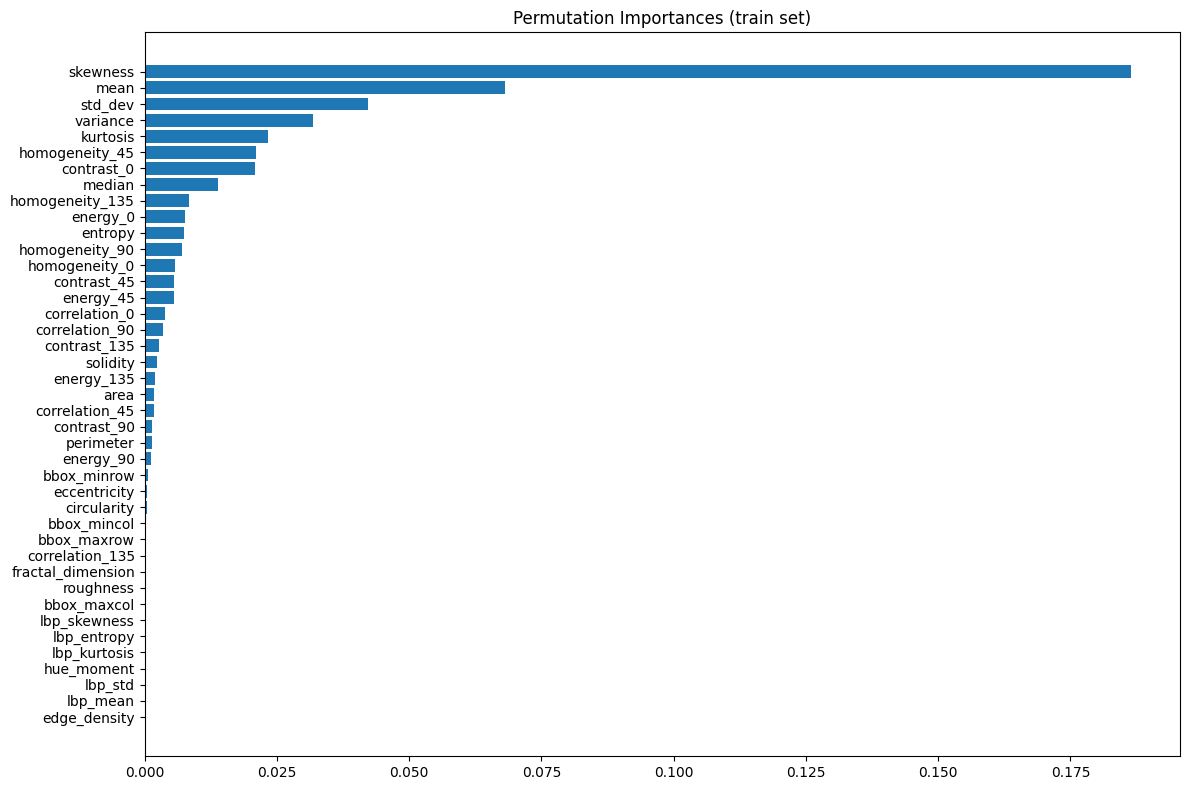

In [93]:
plot_feature_importance(model3,feature_names)

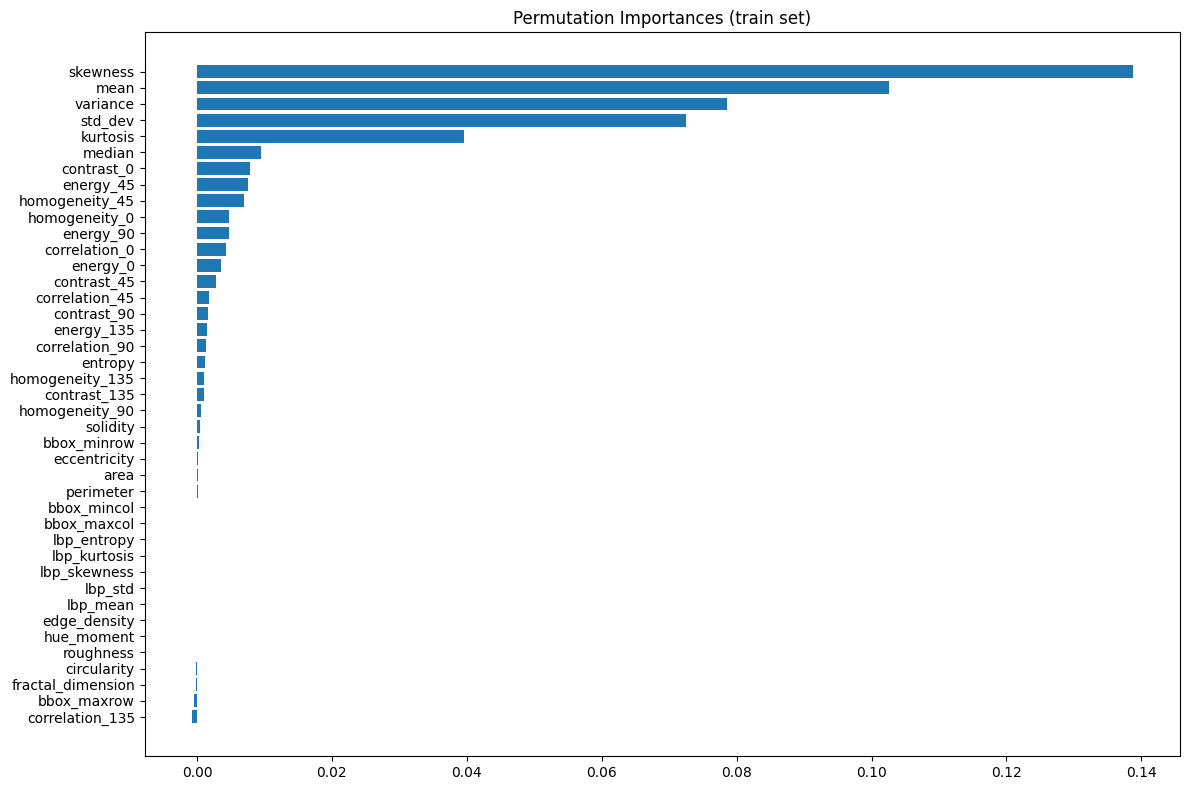

In [94]:
plot_feature_importance(model4,feature_names)

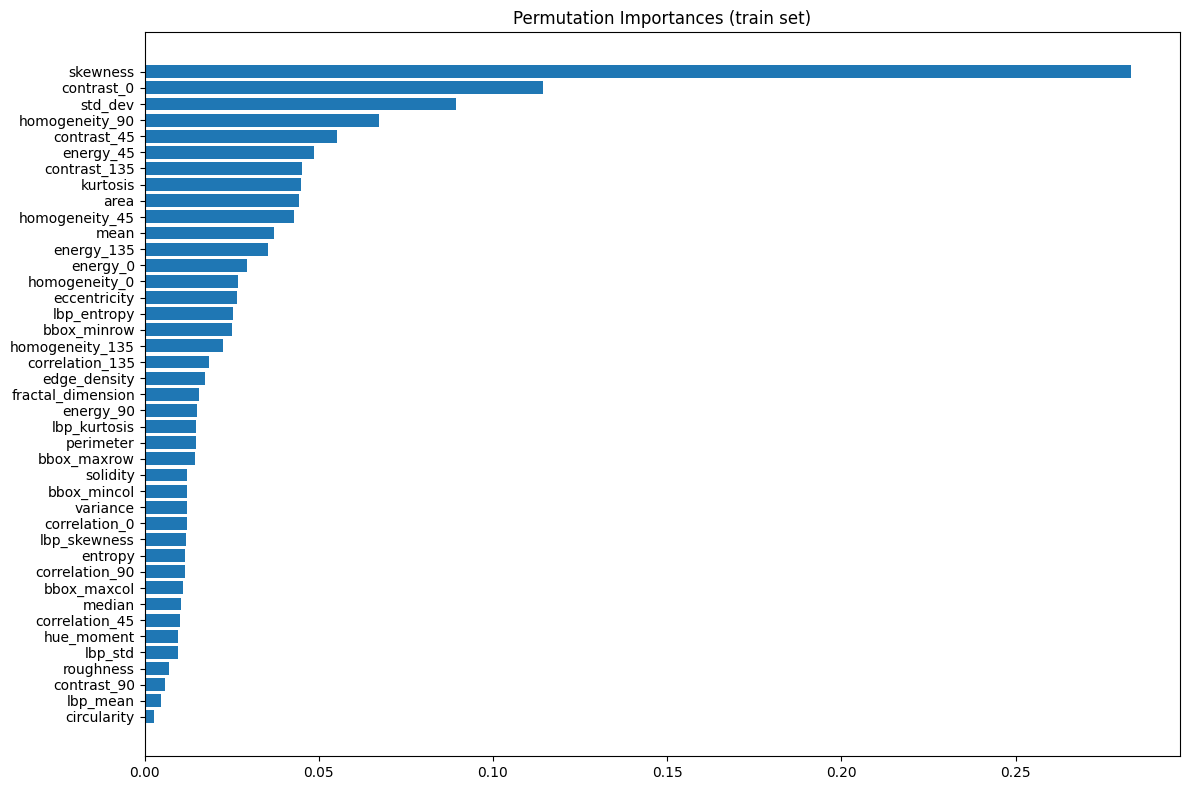

In [95]:
plot_feature_importance(model5,feature_names)

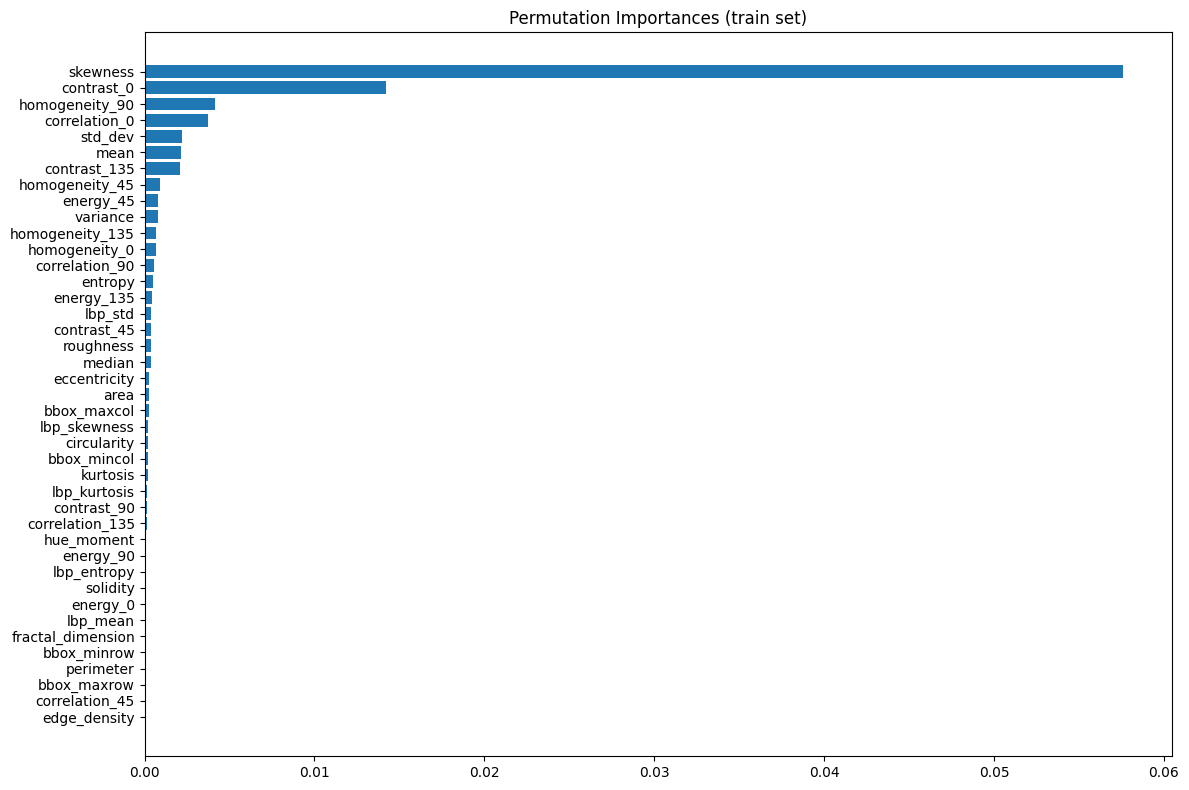

In [96]:
plot_feature_importance(model6,feature_names)